In [118]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm


First we define all functions we are going to need. All of these are in 2d. We calculate the energy, the relative energy error and the positions and velocities using Eulers method.

In [119]:
#Function to calculate the energy when given position and velocity
def energy(w, s): 
    return norm(w)**2/2 - (1/norm(s))

#Function to calculate the relative error of the energies, given the enrgy at t=0
def energy_error(Energies, E_0): 
    rel_E = []
    for Energy in Energies:
        rel_E_i = np.abs((E_0 - Energy)/E_0)
        rel_E.append(np.abs(rel_E_i))
    return rel_E


#Helper function to turn an array of 2d vectords into 2 separate 1d lists 
def turn_vectors_into_2_lists(List):
    x_list = []
    y_list = []
    for i in List:
        x_list.append(i[0])
        y_list.append(i[1])
    return x_list, y_list

#Eulers method to calculate the position and velocity
def calculate(s_0, w_0, h, steps):
    S = []
    W = []
    E = []
    for i in range(steps):
        s_i = s_0 + (w_0*h)
        w_i = w_0 - ((s_0/norm(s_0)**3) * h)
        W.append(w_i)
        S.append(s_i)
        e = energy(w_i, s_i)
        E.append(e)
        s_0 = s_i
        w_0 = w_i
    x_s, y_s = turn_vectors_into_2_lists(S)
    return x_s, y_s, E, W, S

def eccentricity(w, s):
    return (norm(w)**2-(1/norm(s)))*s*0.5 - w*s*w

In [120]:

class Euler():
    def __init__(self, r_0, v_0, h, steps, threed=False):
        self.s_0 = np.array(r_0 / norm(r_0))
        self.w_0 = np.array(v_0 / np.sqrt(1 / norm(r_0)))
        self.h = h
        self.location = [self.s_0]
        self.velocity = [self.w_0]
        self.energies = [1 / 4 * norm(self.w_0) ** 2 - 1 / norm(self.s_0)]
        self.steps = steps
        self.y_location = []
        self.x_location = []
        self.z_location = []
        self.threed = threed
        self.rel_Error = []

    def loc(self, i):
        location_i = self.location[i - 1] + (self.velocity[i - 1] * self.h)
        self.location.append(location_i)
        
    def vel(self, i):
        velocity_i =  self.velocity[i - 1] - ((self.location[i - 1] / norm(self.location[i - 1]) ** 3) * self.h)
        self.velocity.append(velocity_i)

    def energy(self, i):
        e =  1 / 4 * norm(self.velocity[i]) ** 2 - 1 / norm(self.location[i])
        self.energies.append(e)

    def split(self):
        if self.threed == False:
            for location in self.location:
                self.x_location.append(location[0])
                self.y_location.append(location[1])
        else:
            for location in self.location:
                self.x_location.append(location[0])
                self.y_location.append(location[1])
                self.z_location.append(location[2])

    def calc_rel_Error(self, i):
        rel_E_i = np.abs((self.energies[0] - self.energies[i])/self.energies[0])
        self.rel_Error.append(rel_E_i)
            
    def calc(self):
        for i in range(1, self.steps):
            loc = self.loc(i)
            self.vel(i)
            self.energy(i)
            self.calc_rel_Error(i)
            
        self.split()





<IPython.core.display.Javascript object>


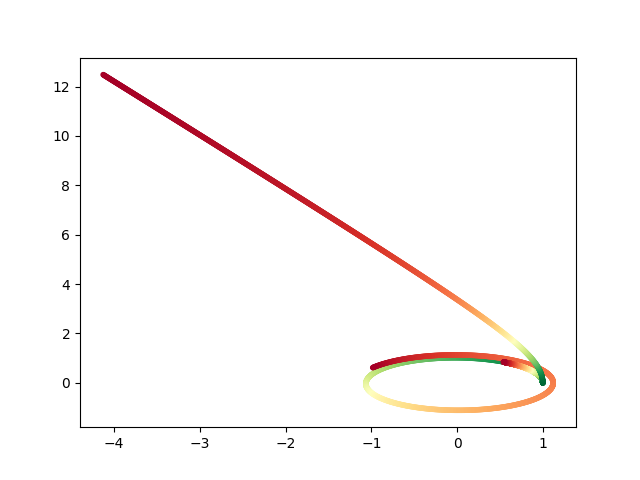

<IPython.core.display.Javascript object>


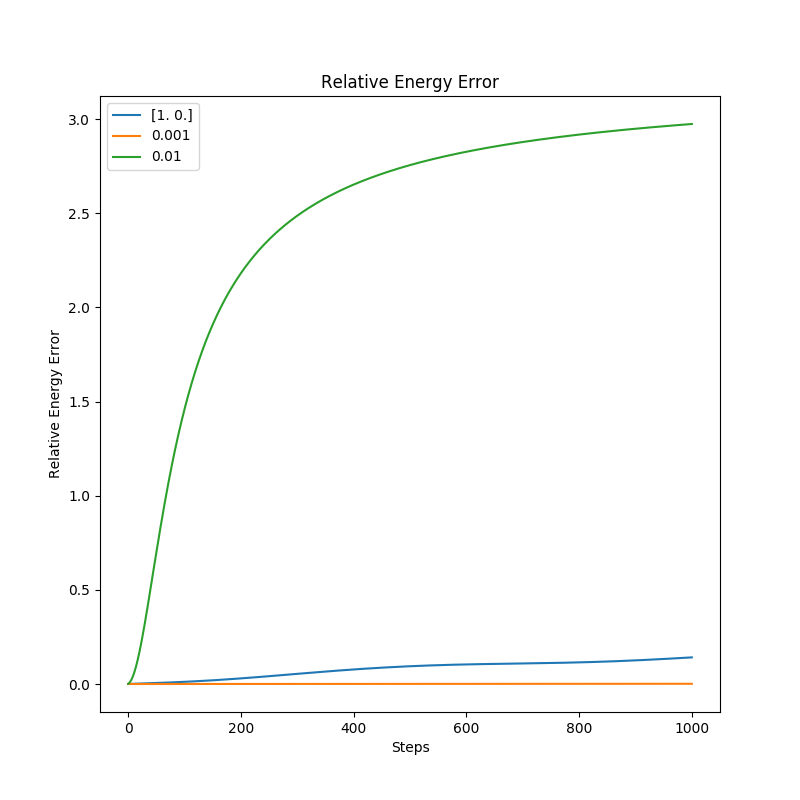

In [121]:
A = Euler([1, 0], [0,1], 0.01, 1000, threed=False)
A.calc()
plt.scatter(A.x_location, A.y_location, c=A.energies, cmap='RdYlGn_r', marker=".")

B = Euler([1, 0], [0,1], 0.001, 1000, threed=False)
B.calc()
plt.scatter(B.x_location, B.y_location, c=B.energies, cmap='RdYlGn_r', marker=".")

C = Euler([1.5, 0], [0,1.5], 0.01, 1000, threed=False)
C.calc()
plt.scatter(C.x_location, C.y_location, c=C.energies, cmap='RdYlGn_r', marker=".")


plt.figure(figsize=(8,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(np.linspace(0, A.steps, len(A.rel_Error)), A.rel_Error, label=A.s_0)
plt.plot(np.linspace(0, B.steps, len(B.rel_Error)), B.rel_Error, label=f"{str(B.h)}")
plt.plot(np.linspace(0, C.steps, len(C.rel_Error)), C.rel_Error, label=f"{str(C.h)}")
plt.legend()

We try the calculate function with a vector $\vec{s} = (1,0)^T$, the velocity is perpendicular to the position vector, thus the calculation should follow a circle. $\vec{w} = (0,1)^T$. We set the timesteps to $\Delta t = 0.05$ and the iteration steps to 200 and plot the relative Error after each step.

<IPython.core.display.Javascript object>


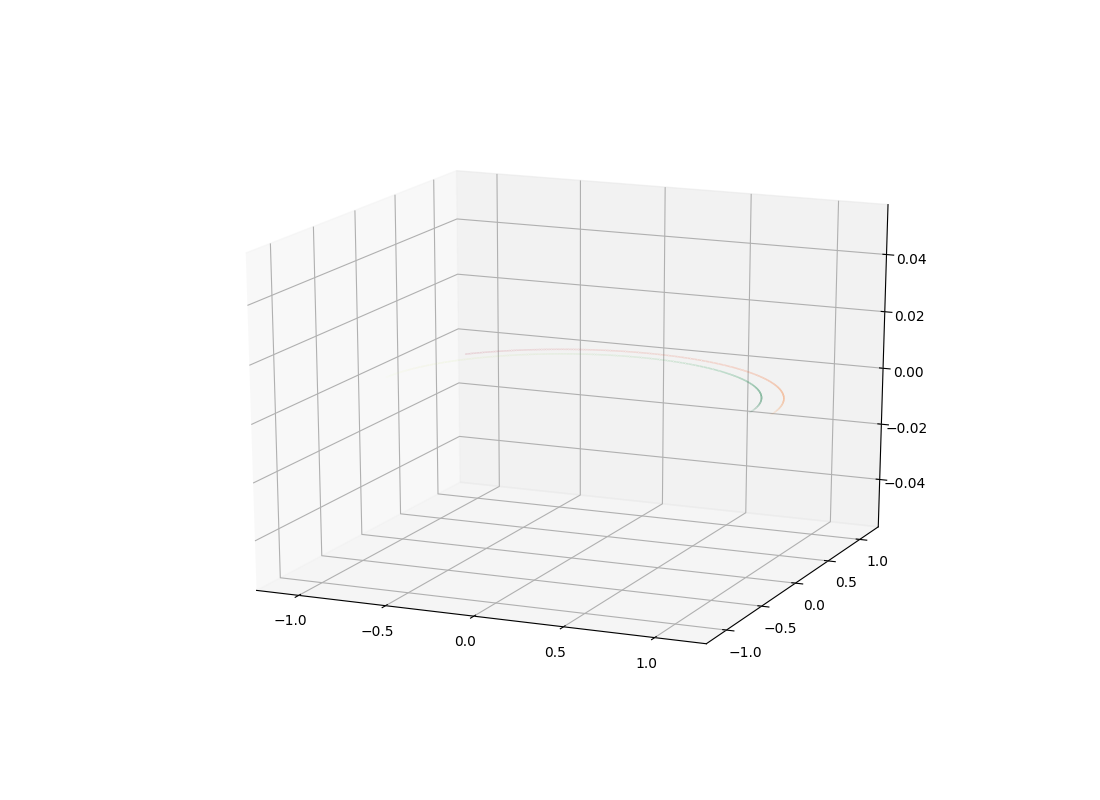

<IPython.core.display.Javascript object>


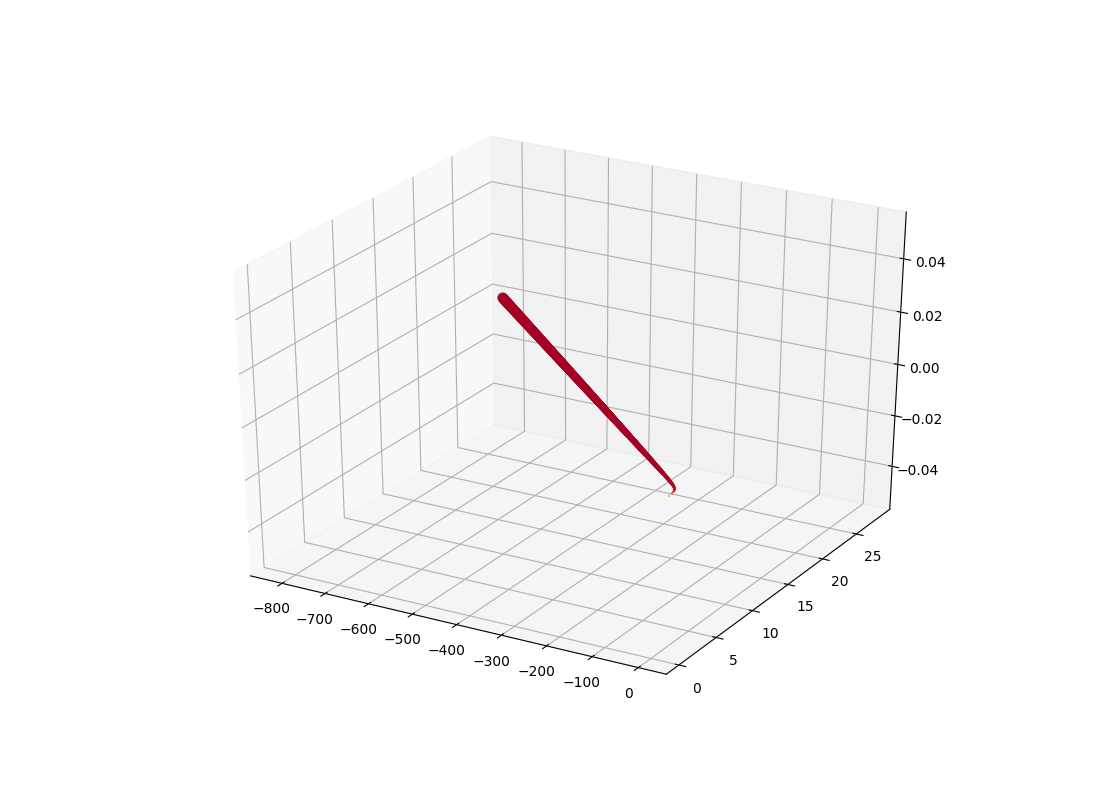

<IPython.core.display.Javascript object>


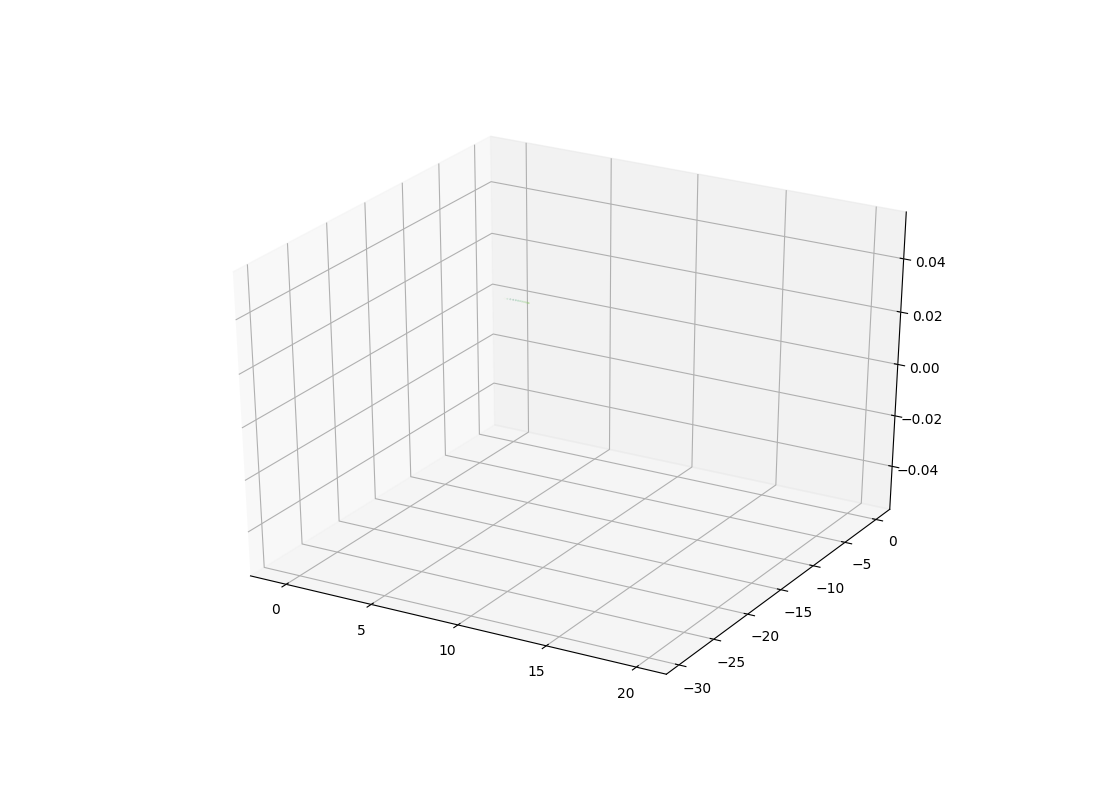

<IPython.core.display.Javascript object>


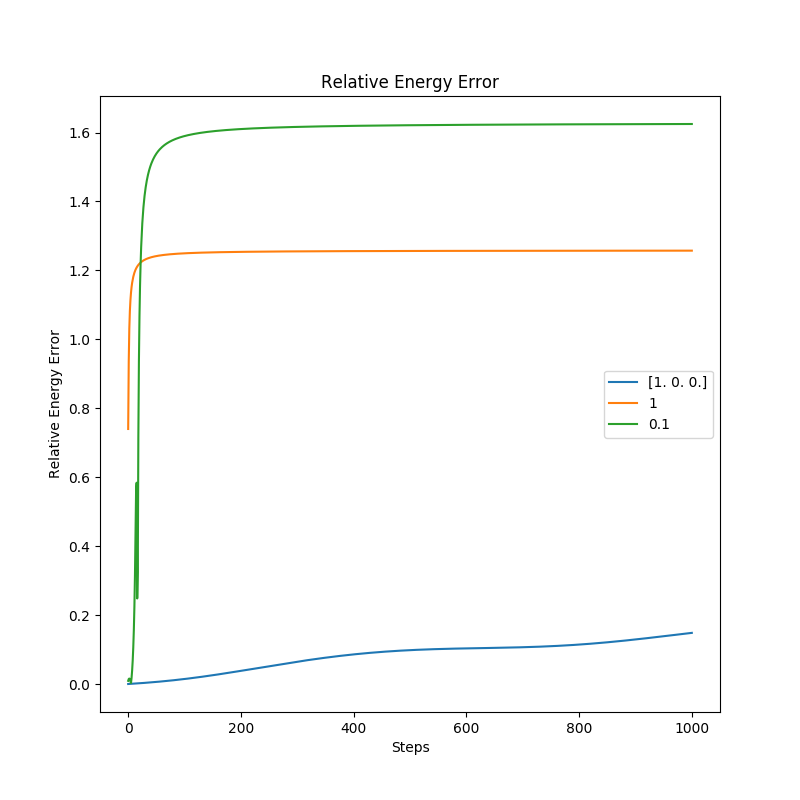

In [129]:
A = Euler([1, 0, 0], [0, 1, 0.1], 0.01, 1000, threed=True)
A.calc()
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(A.x_location, A.y_location, A.z_location, c=A.energies, cmap='RdYlGn_r', marker=".")

B = Euler([1, 0.4, 0], [0, 1, 0.5], 1, 1000, threed=True)

B.calc()
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(B.x_location, B.y_location, B.z_location, c=B.energies, cmap='RdYlGn_r', marker=".")

C = Euler([1, 0, 0], [0.1, 0.1, .5], 0.1, 1000, threed=True)

C.calc()
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(C.x_location, C.y_location, C.z_location, c=C.energies, cmap='RdYlGn_r', marker=".")


plt.figure(figsize=(8,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(np.linspace(0, A.steps, len(A.rel_Error)), A.rel_Error, label=A.s_0)
plt.plot(np.linspace(0, B.steps, len(B.rel_Error)), B.rel_Error, label=f"{str(B.h)}")
plt.plot(np.linspace(0, C.steps, len(C.rel_Error)), C.rel_Error, label=f"{str(C.h)}")
plt.legend()

#A = Euler([1, 0, 0], [0,1, 0.5], 0.01, 1000, threed=True)
#A.calc()
#fig = plt.figure(figsize=(11,8))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(A.x_location, A.y_location, A.z_location, c=A.energies, cmap='RdYlGn_r', marker=".")

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


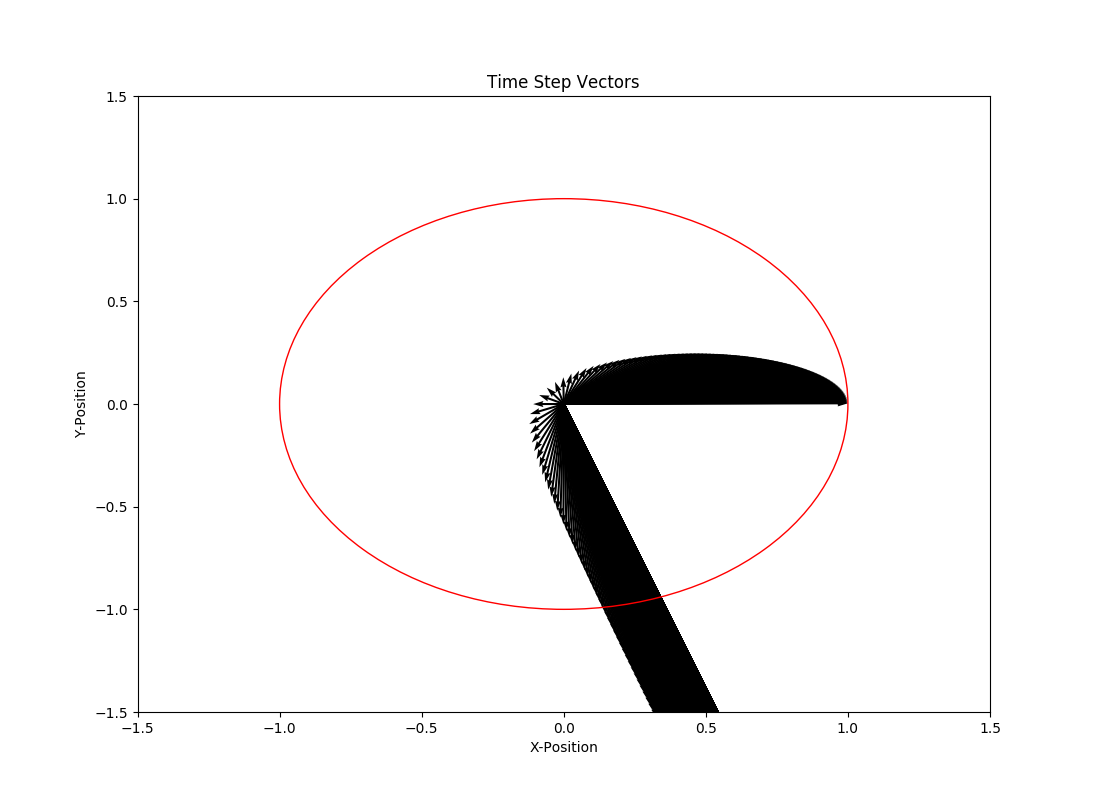

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


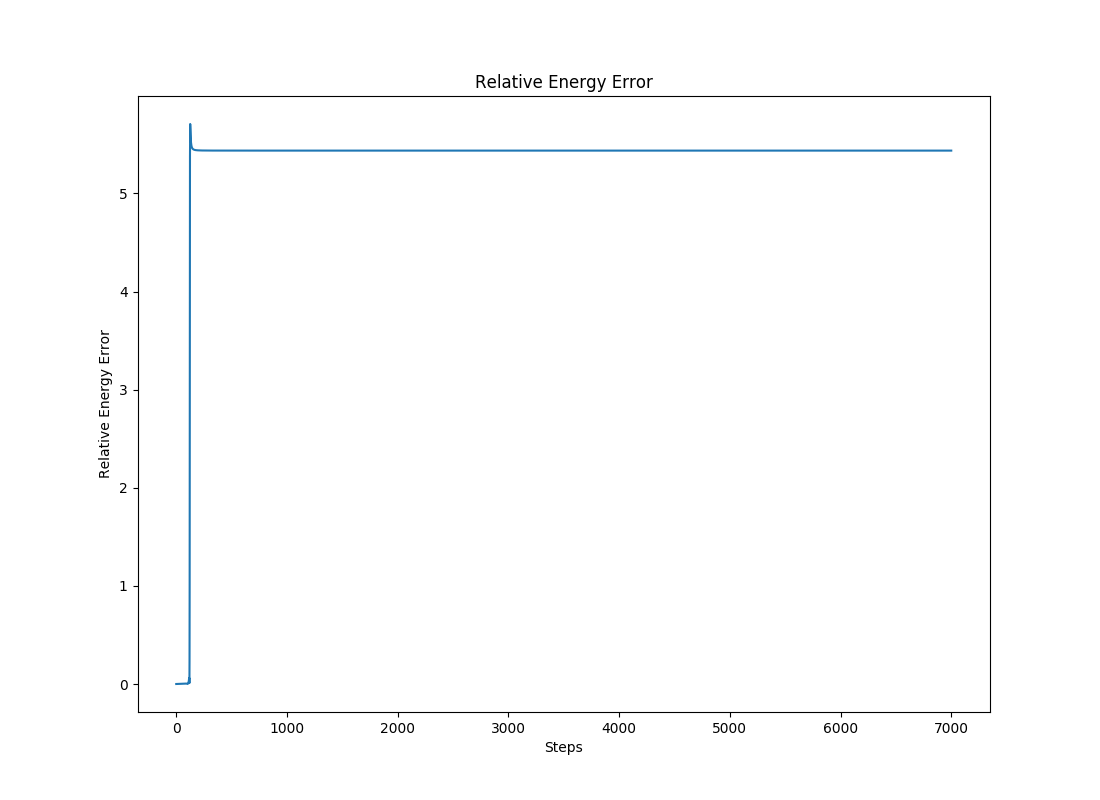

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


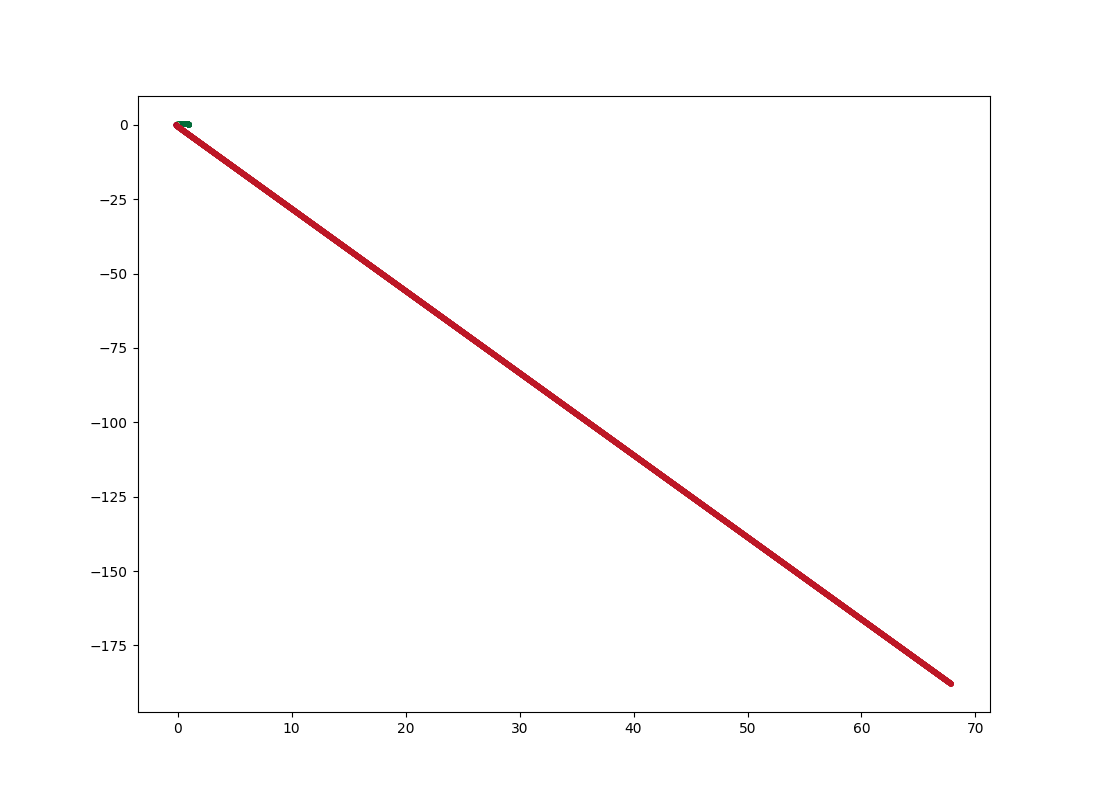

[-0.44444444 -0.        ]
[218.47265887 605.93945235]


In [101]:
#First we specifiy our parameters
w = np.array([0, 1/3])
s = np.array([1, 0])
s = s/norm(s)
w = w/norm(np.sqrt(s))
stepsize = .01
steps = 7000

#Then we create the first 2D vector plot
plt.figure(figsize=(11,8))
plt.title("Time Step Vectors")
plt.xlabel("X-Position")
plt.ylabel("Y-Position")
#Then we calculate the values for the X and Y Position, the Energies and the velocities
x_s, y_s, E, W, S = calculate(s, w, stepsize, steps)
#Using E we can calcuklate the relative Error of the energy after each step
rel_E_err = energy_error(E, energy(w,s))

#This is needed to create the vector plot
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
#We add a circle to better evaluate our results
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

#We create a second plot for the energy error
plt.figure(figsize=(11,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)

#The thirs plot shows the positions and marks the relative energy error (green=low, red=high)
plt.figure(figsize=(11,8))
plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")




print(eccentricity(w, s))
print(eccentricity(W[-1], S[-1]))

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


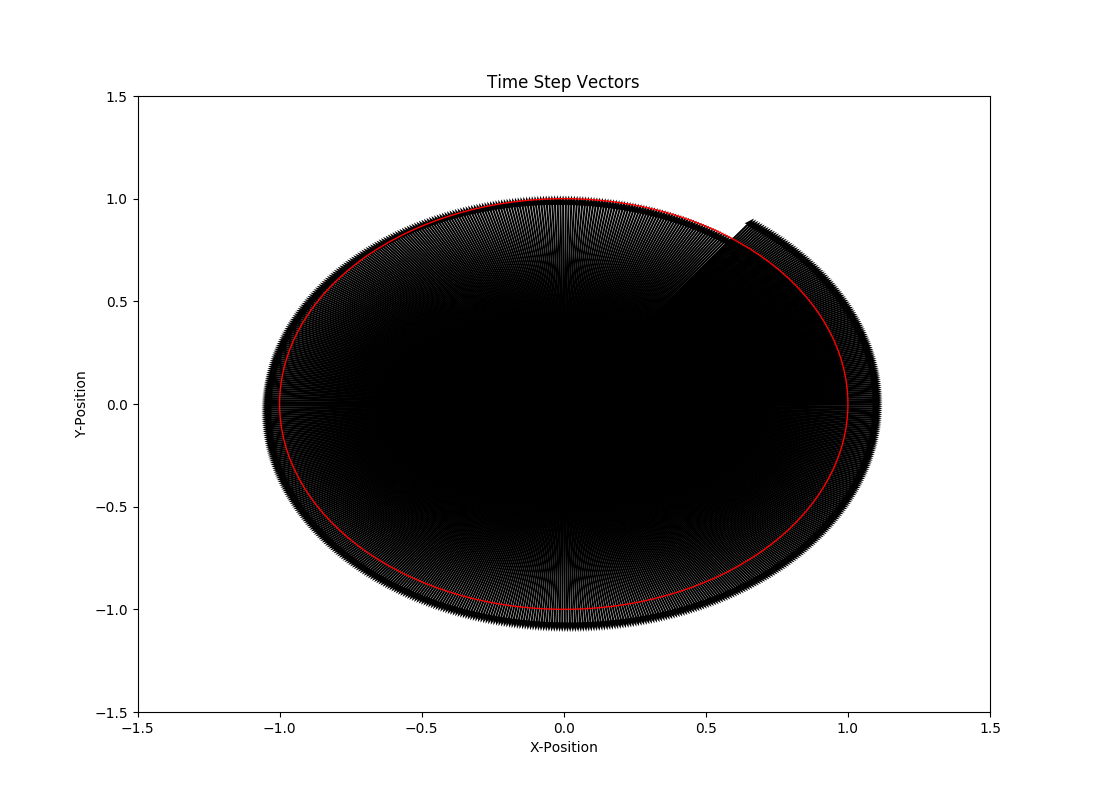

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


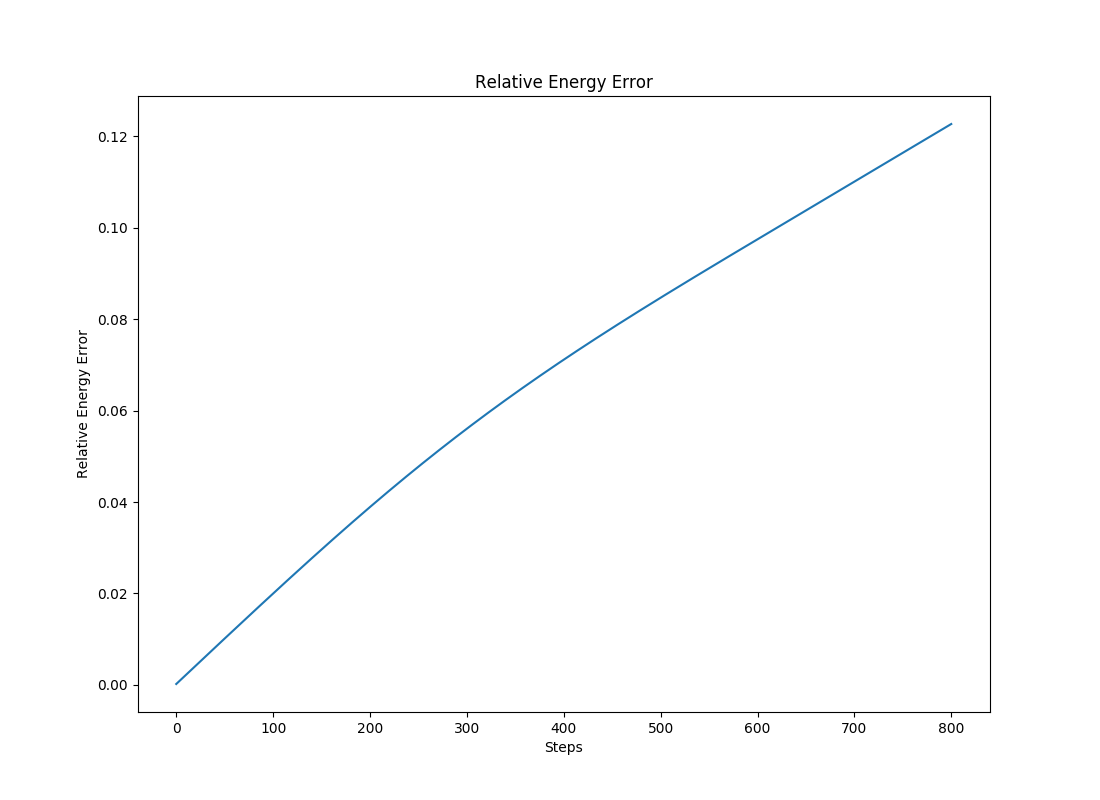

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


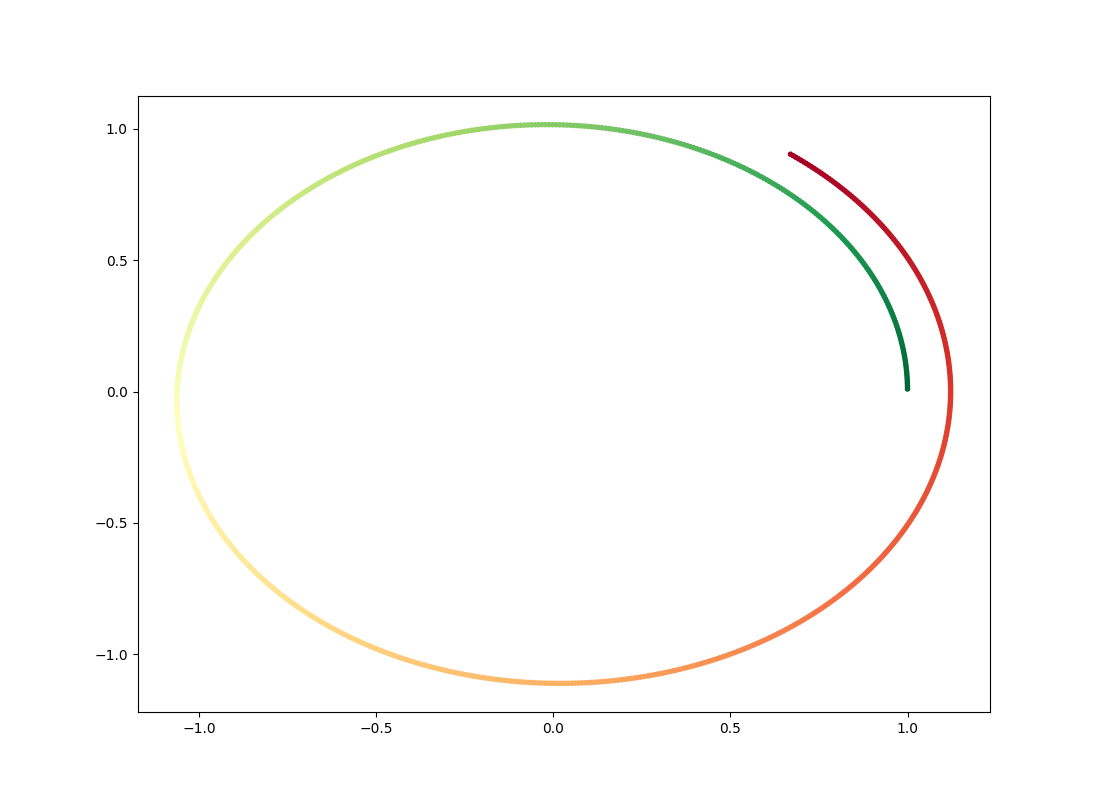

In [96]:
#First we specifiy our parameters
w = np.array([0, 1.])
s = np.array([1, 0])
s = s/norm(s)
w = w/norm(np.sqrt(s))
stepsize = .01
steps = 800

#Then we create the first 2D vector plot
plt.figure(figsize=(11,8))
plt.title("Time Step Vectors")
plt.xlabel("X-Position")
plt.ylabel("Y-Position")
#Then we calculate the values for the X and Y Position, the Energies and the velocities
x_s, y_s, E, W, S = calculate(s, w, stepsize, steps)
#Using E we can calcuklate the relative Error of the energy after each step
rel_E_err = energy_error(E, energy(w,s))

#This is needed to create the vector plot
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
#We add a circle to better evaluate our results
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

#We create a second plot for the energy error
plt.figure(figsize=(11,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)

#The thirs plot shows the positions and marks the relative energy error (green=low, red=high)
plt.figure(figsize=(11,8))
plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")

<IPython.core.display.Javascript object>


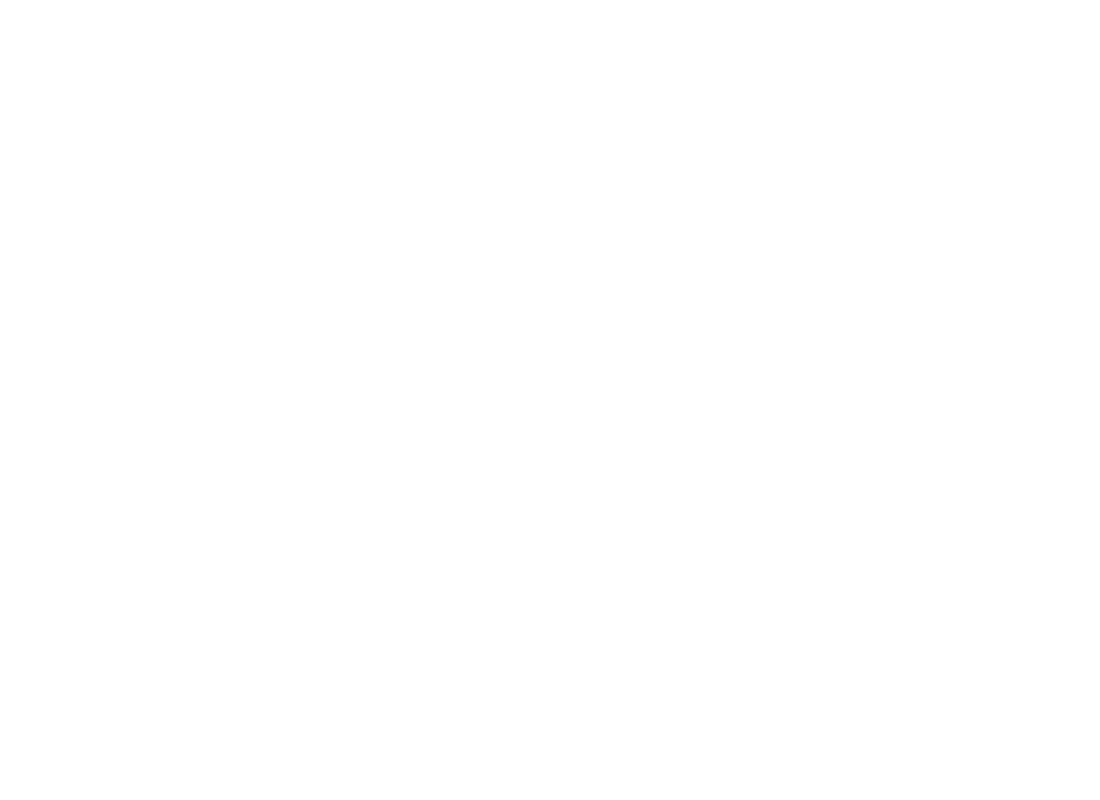

<IPython.core.display.Javascript object>


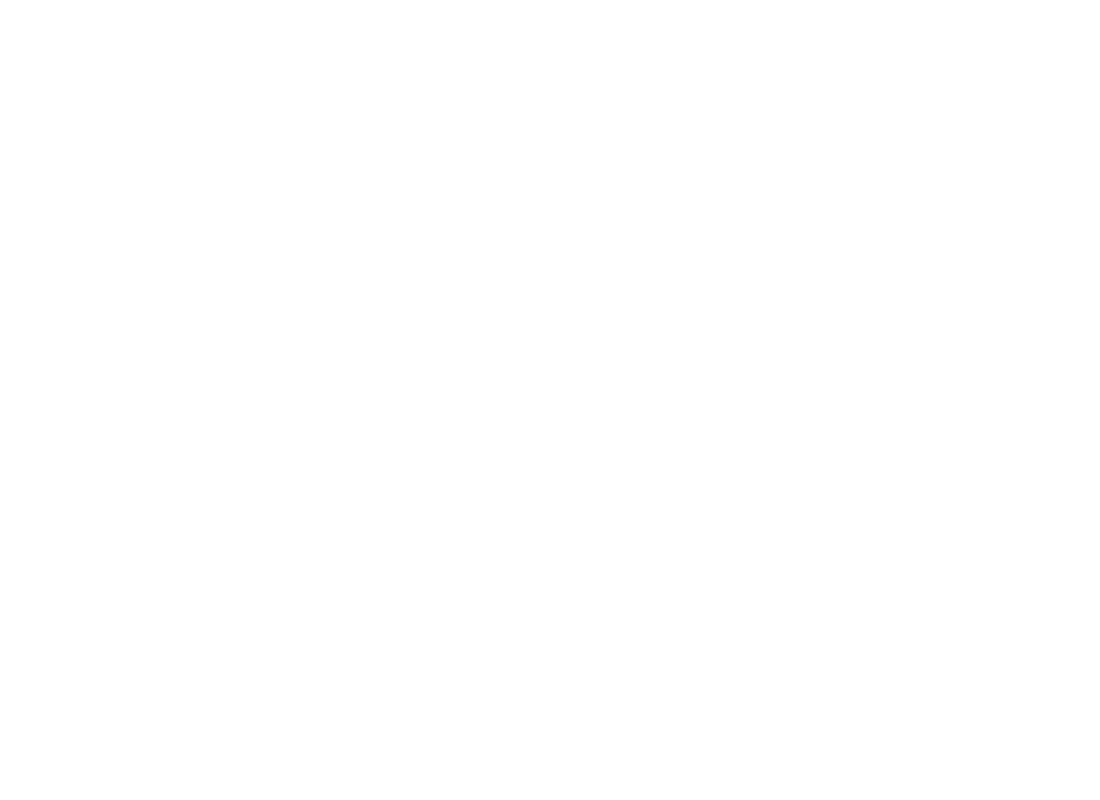

<IPython.core.display.Javascript object>


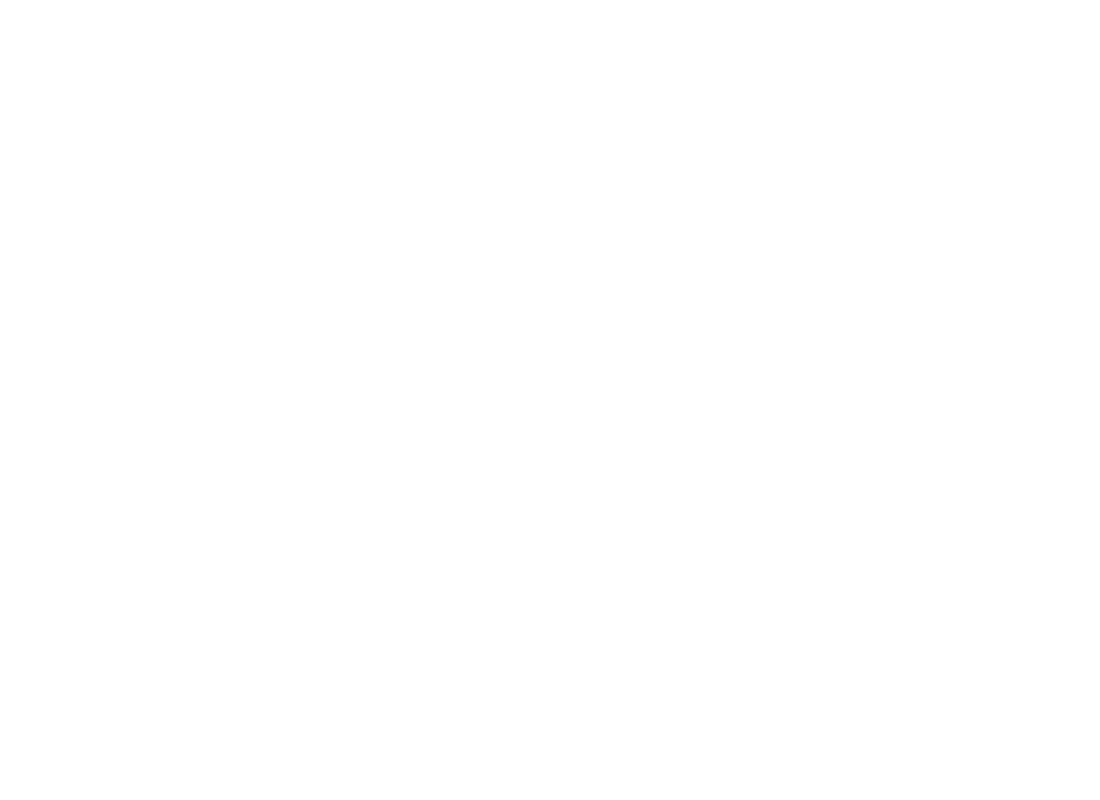

In [58]:
w = np.array([0, 5])
s = np.array([1, 0])
steps = 670
stepsize = 0.01


plt.figure(figsize=(11,8))

x_s, y_s, E, W, S = calculate(s, w, stepsize, steps)

rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))
#plt.show()
steps_array = np.linspace(0, steps, steps)
plt.figure(figsize=(11,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(steps_array, rel_E_err)
plt.figure(figsize=(11,8))

plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")

<IPython.core.display.Javascript object>


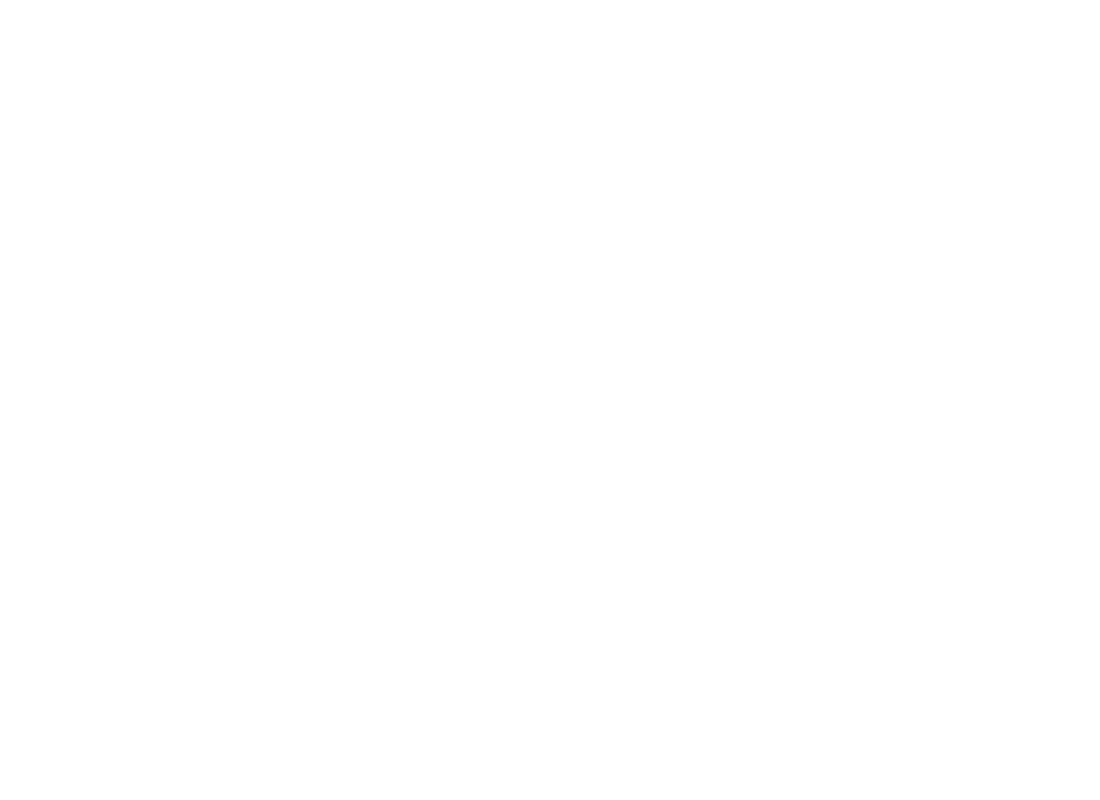

<IPython.core.display.Javascript object>


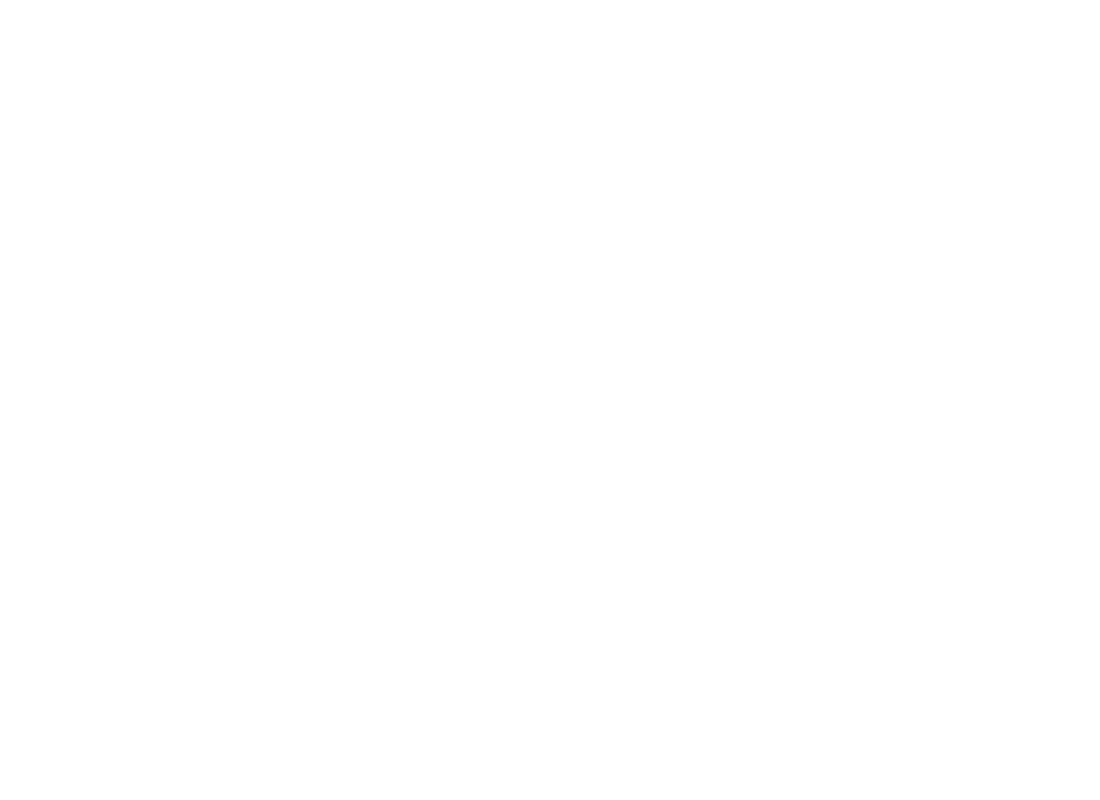

<IPython.core.display.Javascript object>


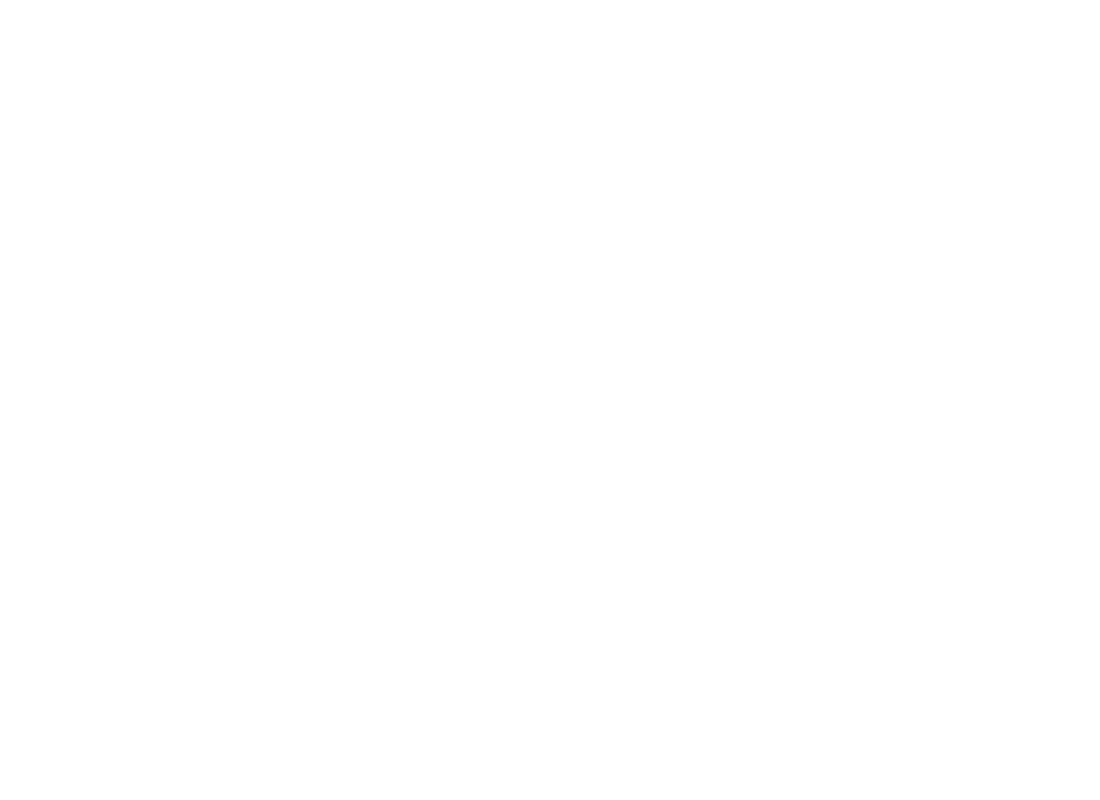

In [59]:
w = np.array([0, 1])
s = np.array([1, 0])
stepsize = 0.001
steps = 6500

plt.figure(figsize=(11,8))

x_s, y_s, E, W, S = calculate(s, w, stepsize, steps)

rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))
steps_array = np.linspace(0, steps, steps)
plt.figure(figsize=(11,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(steps_array, rel_E_err)

plt.figure(figsize=(11,8))

plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")

<IPython.core.display.Javascript object>


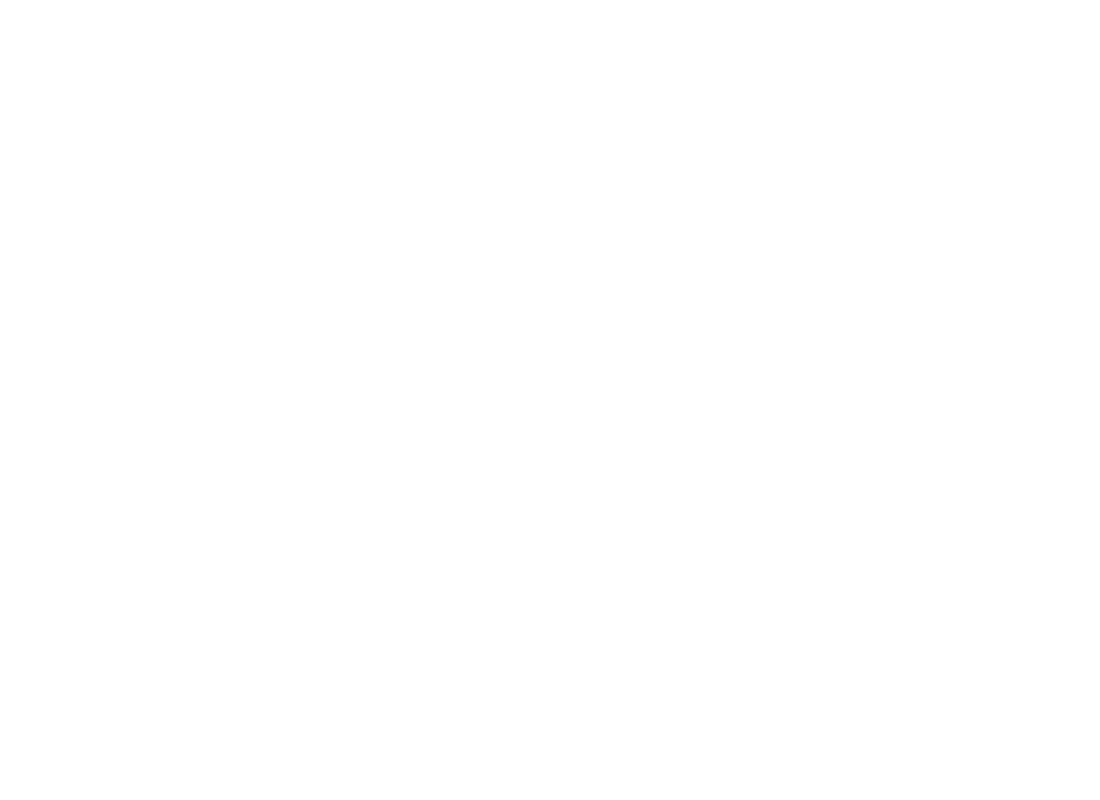

<IPython.core.display.Javascript object>


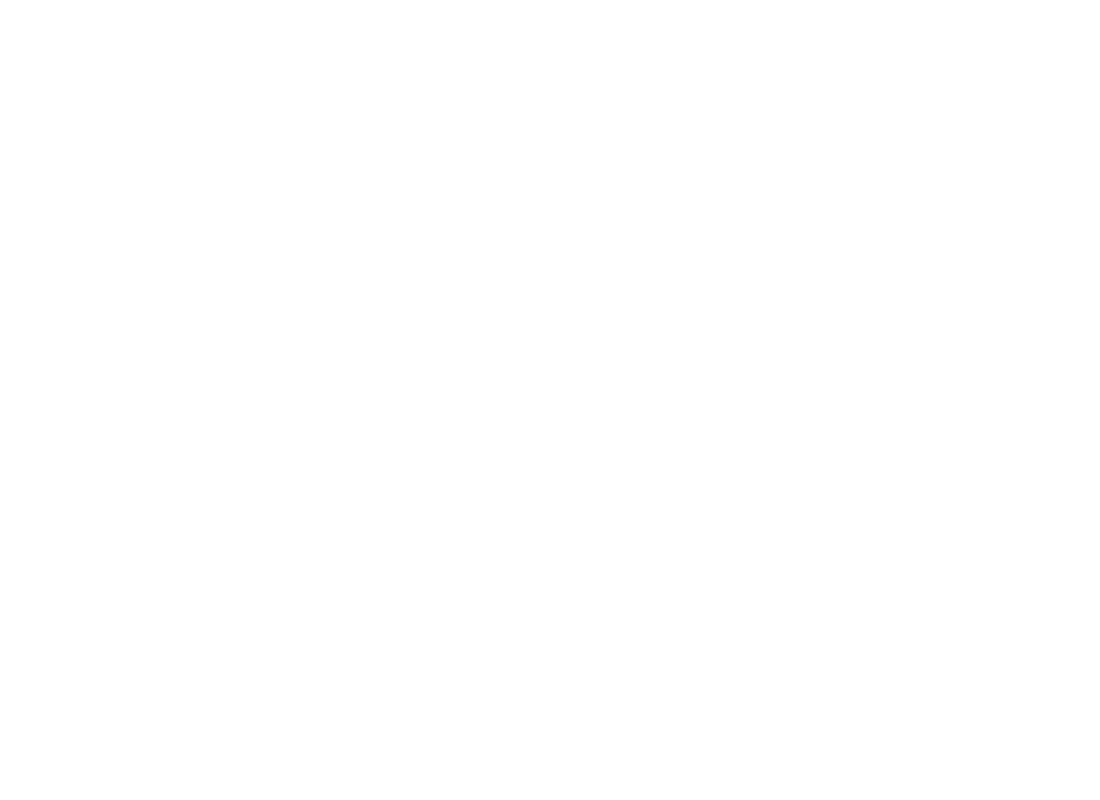

<IPython.core.display.Javascript object>


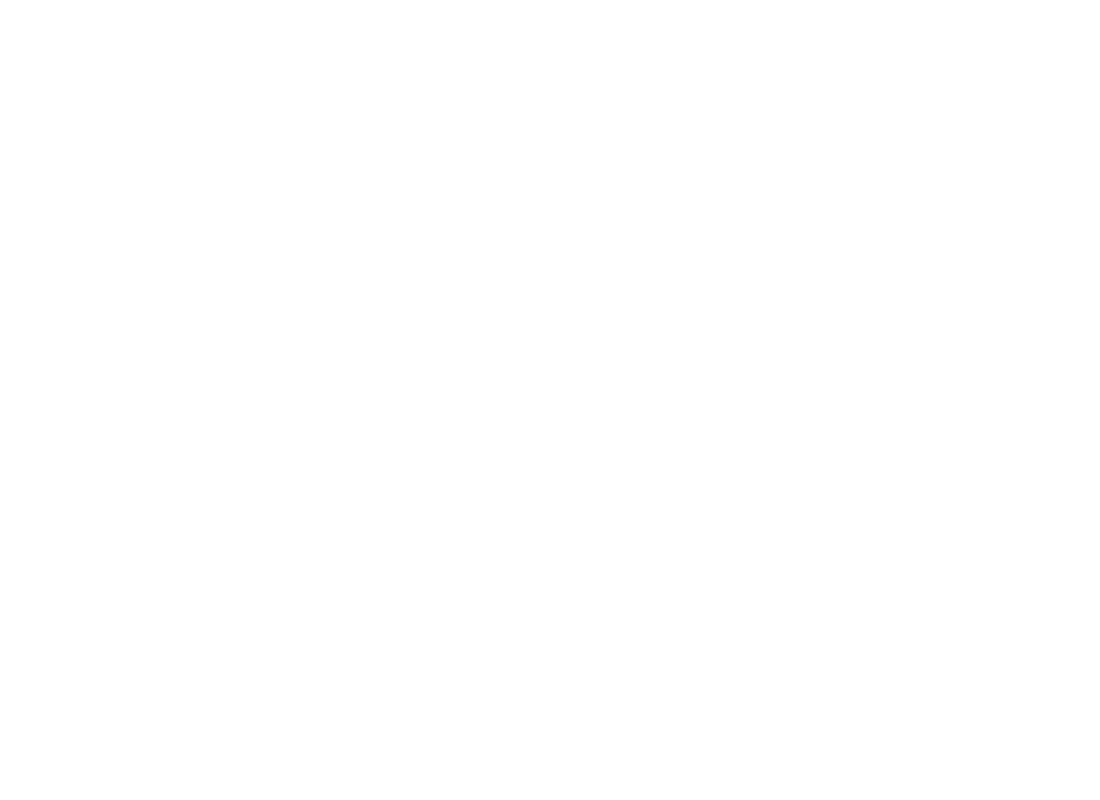

In [60]:
w = np.array([0, 0.6])
s = np.array([1, 0])
steps = 350
stepsize = 0.01

plt.figure(figsize=(11,8))

x_s, y_s, E, W, S = calculate(s, w, stepsize, steps)

rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

steps_array = np.linspace(0, steps, steps)
plt.figure(figsize=(11,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(steps_array, rel_E_err)


plt.figure(figsize=(11,8))
plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")

<IPython.core.display.Javascript object>


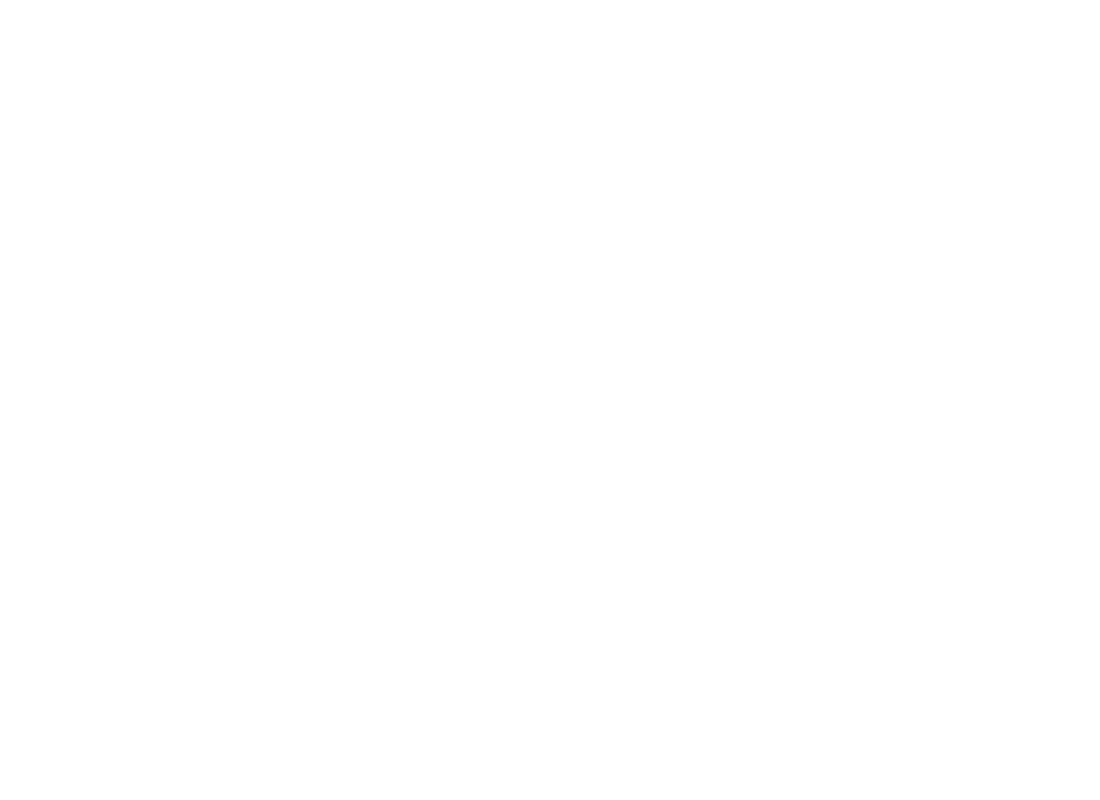

<IPython.core.display.Javascript object>


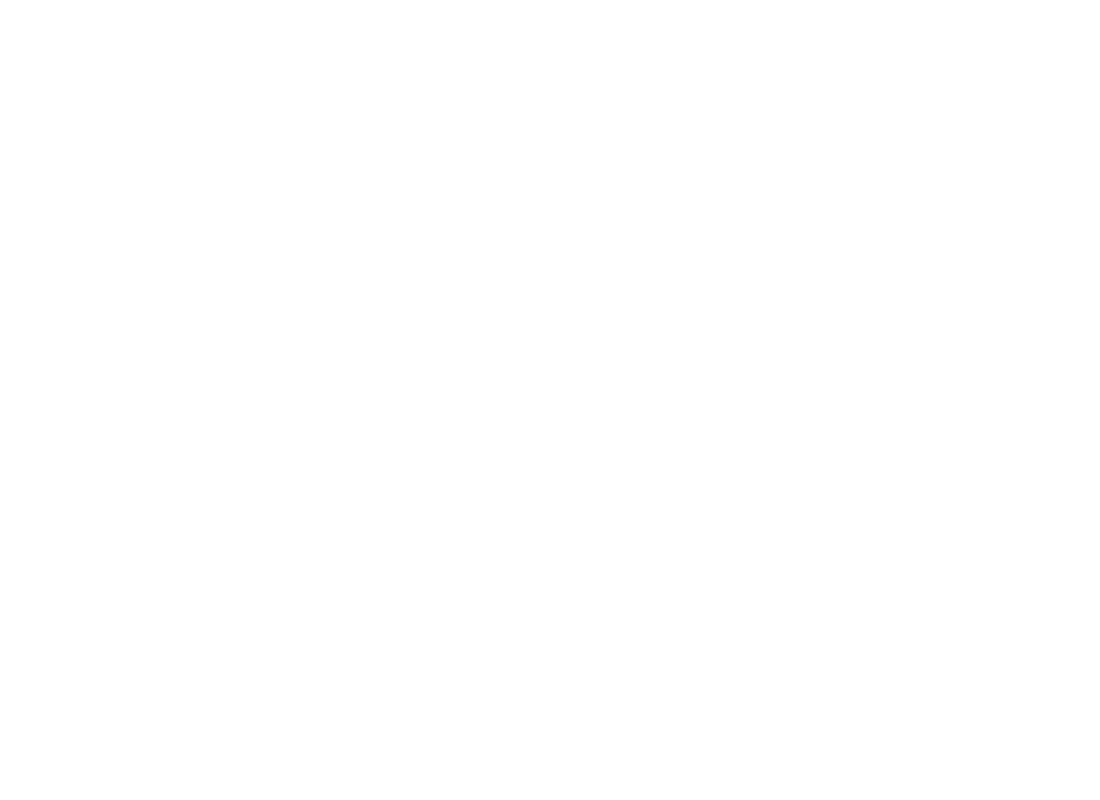

<IPython.core.display.Javascript object>


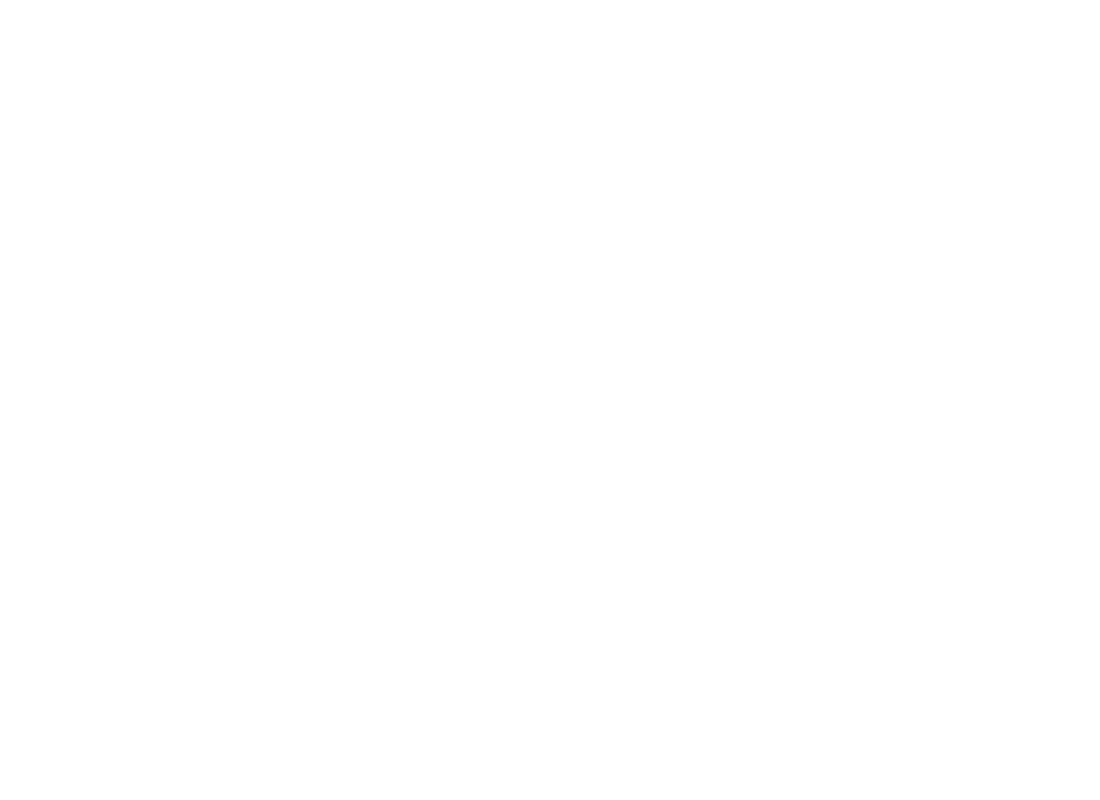

In [61]:
w = np.array([0, 0.9])
s = np.array([0.55, 0])
stepsize = 0.01
steps = 2000

plt.figure(figsize=(11,8))

x_s, y_s, E, W, S = calculate(s, w, stepsize, steps)

rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")

plt.figure(figsize=(11,8))

plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")


In [65]:
def calc_abs_energy_err(s, w, h):
    energy_error_time_step = []
    for t in h:
        _, _, E, _, _ = calculate(s, w, t, steps)
        E_err = np.abs((E[-1]-energy(w,s))/energy(w,s))
        energy_error_time_step.append(E_err)
    return energy_error_time_step

<IPython.core.display.Javascript object>


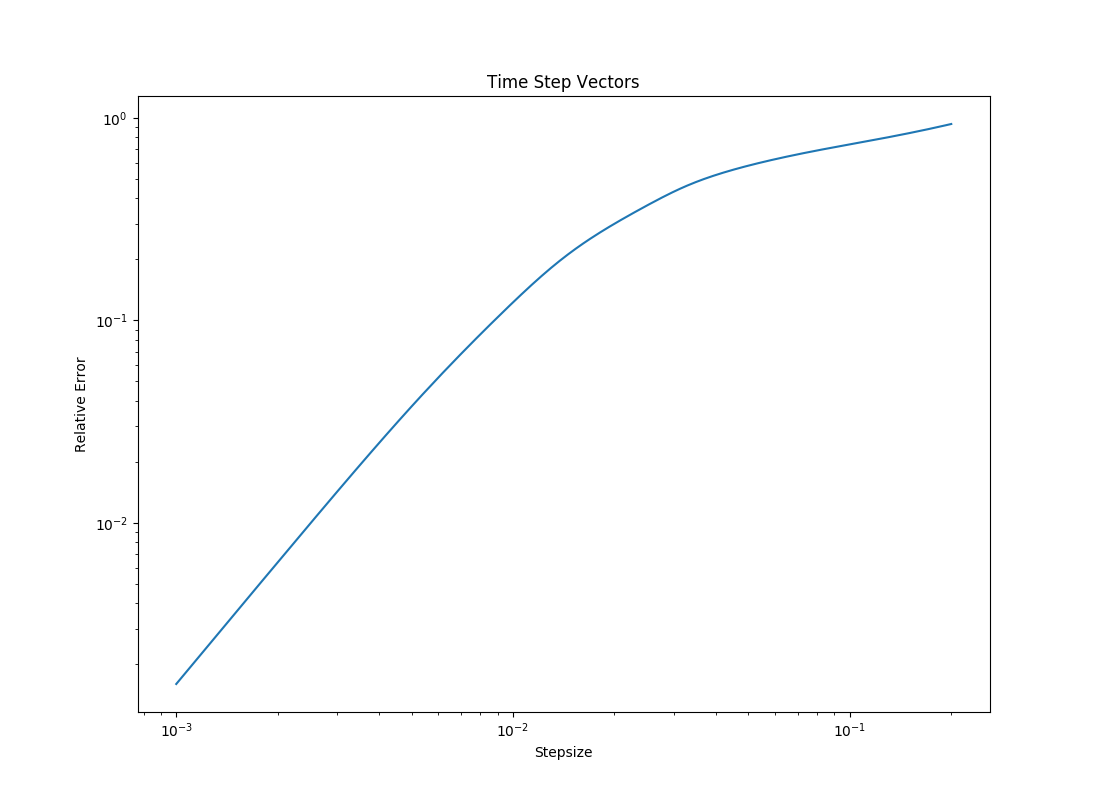

In [66]:
w = np.array([0, 1])
s = np.array([1, 0])
stepsize = 0.001
steps = 800
h = np.linspace(0.001, 0.2, 500)

plt.figure(figsize=(11,8))
plt.title("Time Step Vectors")
plt.xlabel("Stepsize")
plt.ylabel("Relative Error")
plt.yscale("log")
plt.xscale("log")
rel_E_err = calc_abs_energy_err(s, w, h)
plt.plot(h, rel_E_err)


In [72]:
#Implement leap frog iteration
def calculate_leap(s_0, w_0, h, steps):
    S = []
    W = []
    E = []
    for i in range(steps):
        if i == 0:
            w_i_12 = w_0 - (((s_0/norm(s_0)**3) * h*0.5))
        else:
            w_i_12 = w_0 - (((s_0/norm(s_0)**3) * h))
        s_i_1 = s_0 + w_i_12*h
        W.append(w_i_12)
        S.append(s_i_1)
        e = energy(w_i_12, s_i_1)
        E.append(e)
        s_0 = s_i_1
        w_0 = w_i_12
    x_s, y_s = turn_vectors_into_2_lists(S)
    return x_s, y_s, E, W

<IPython.core.display.Javascript object>


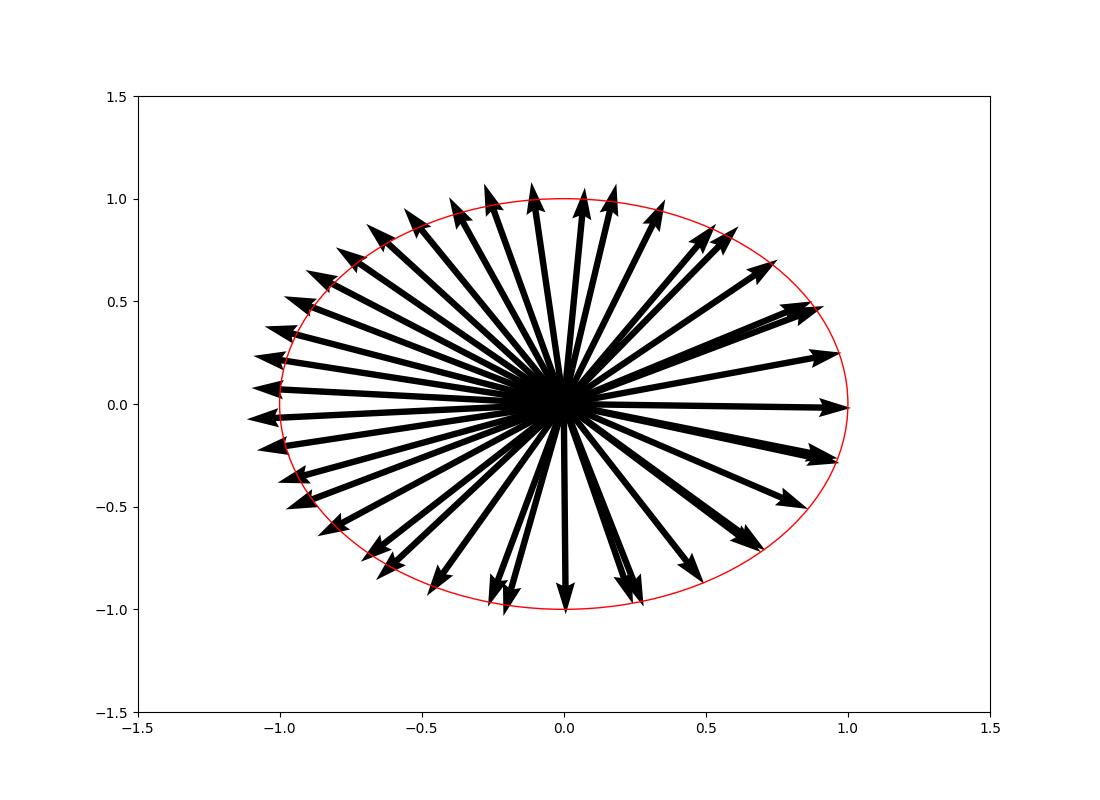

<IPython.core.display.Javascript object>


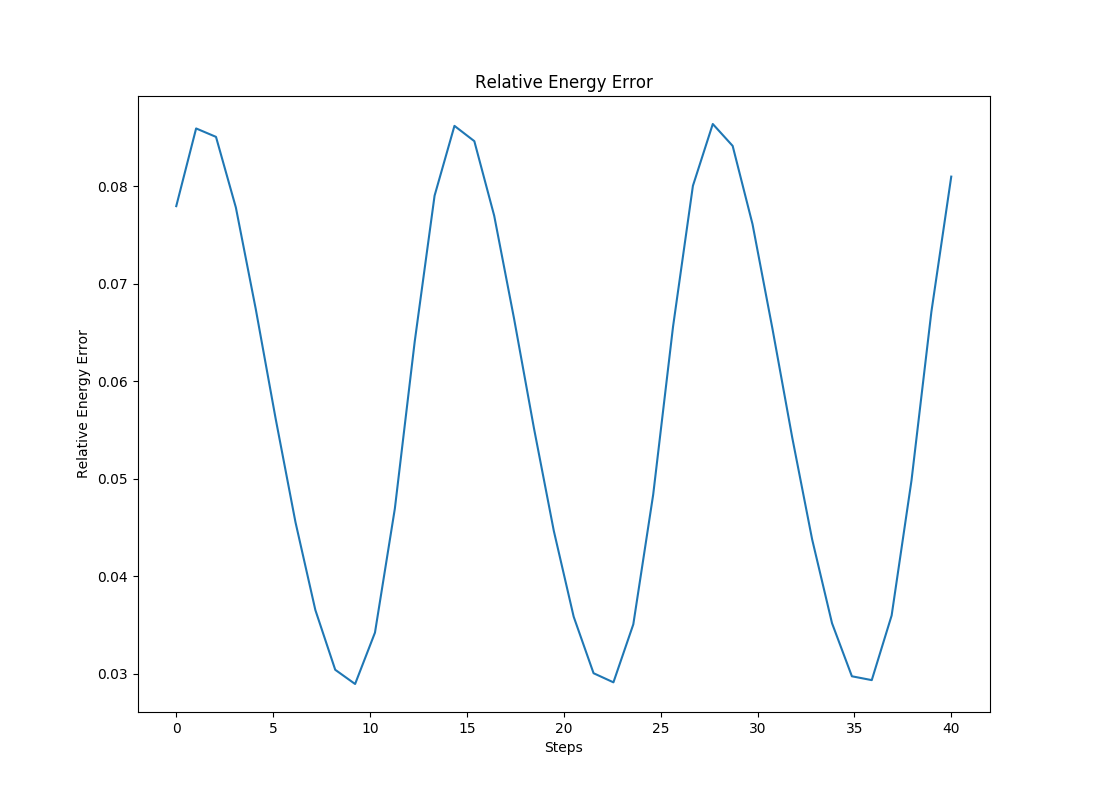

<IPython.core.display.Javascript object>


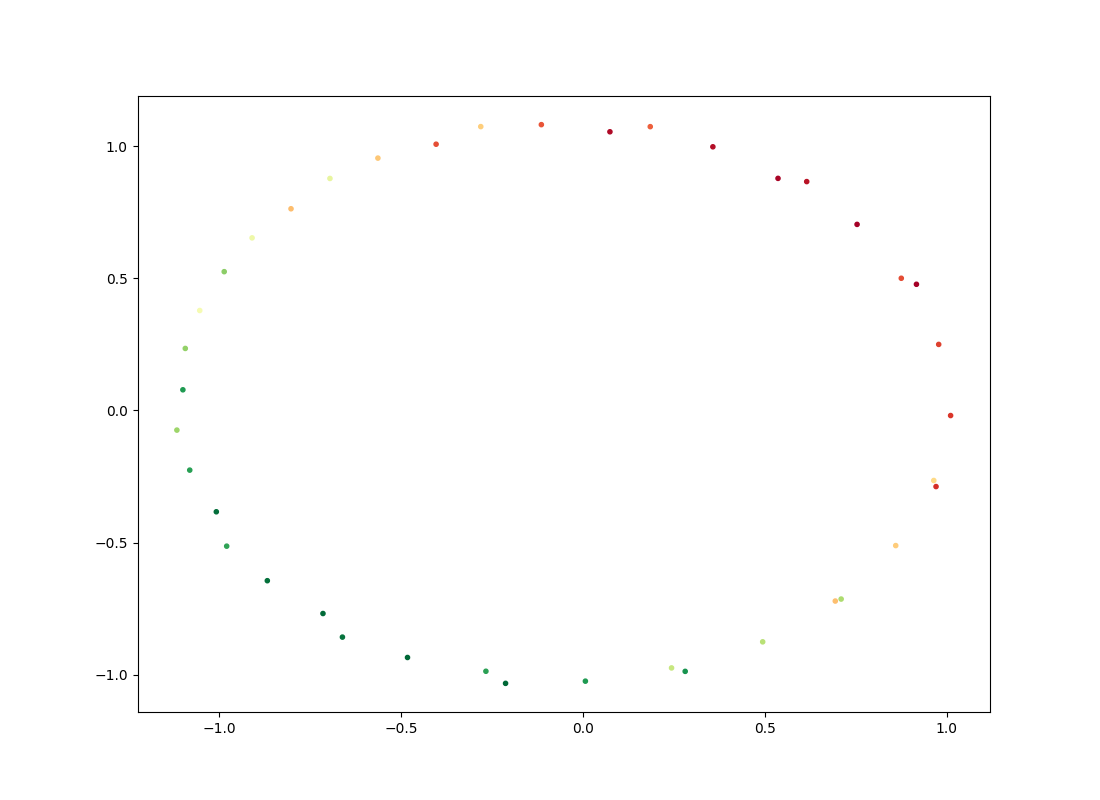

In [73]:

w = np.array([0, 1])
s = np.array([1, 0])
stepsize = 0.5
steps = 40

plt.figure(figsize=(11,8))

x_s, y_s, E, _ = calculate_leap(s, w, stepsize, steps)
rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")

plt.figure(figsize=(11,8))


plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")

<IPython.core.display.Javascript object>


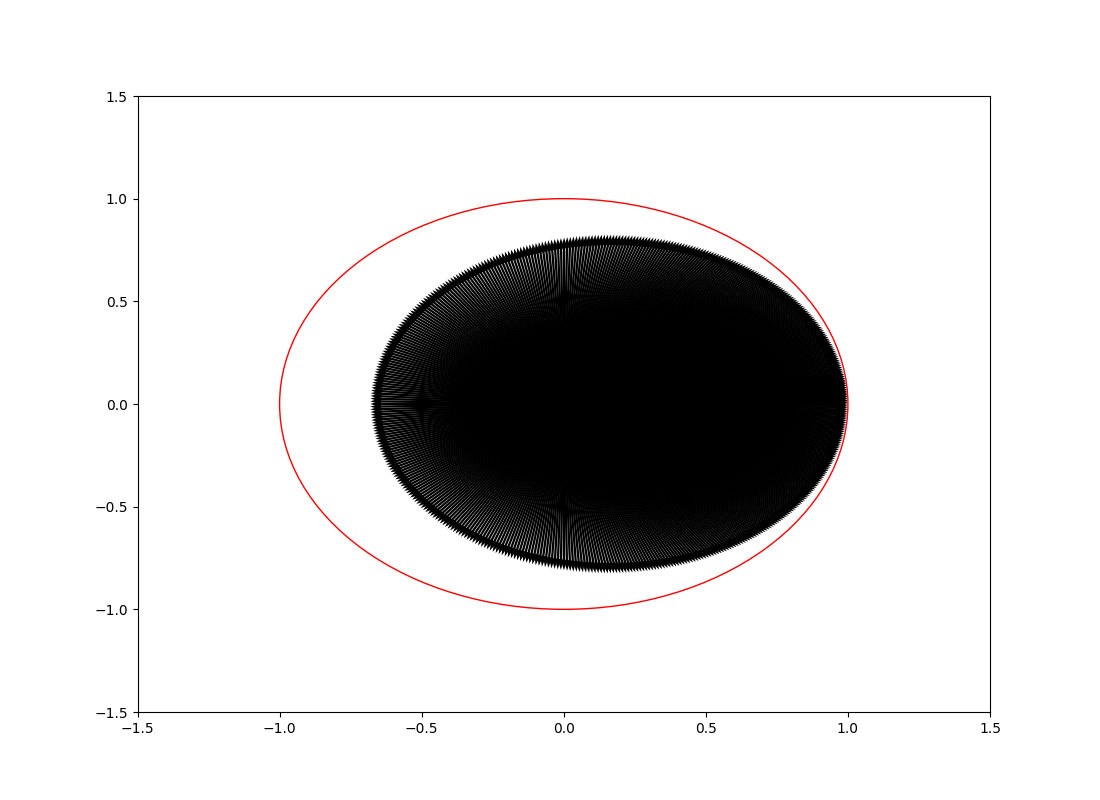

<IPython.core.display.Javascript object>


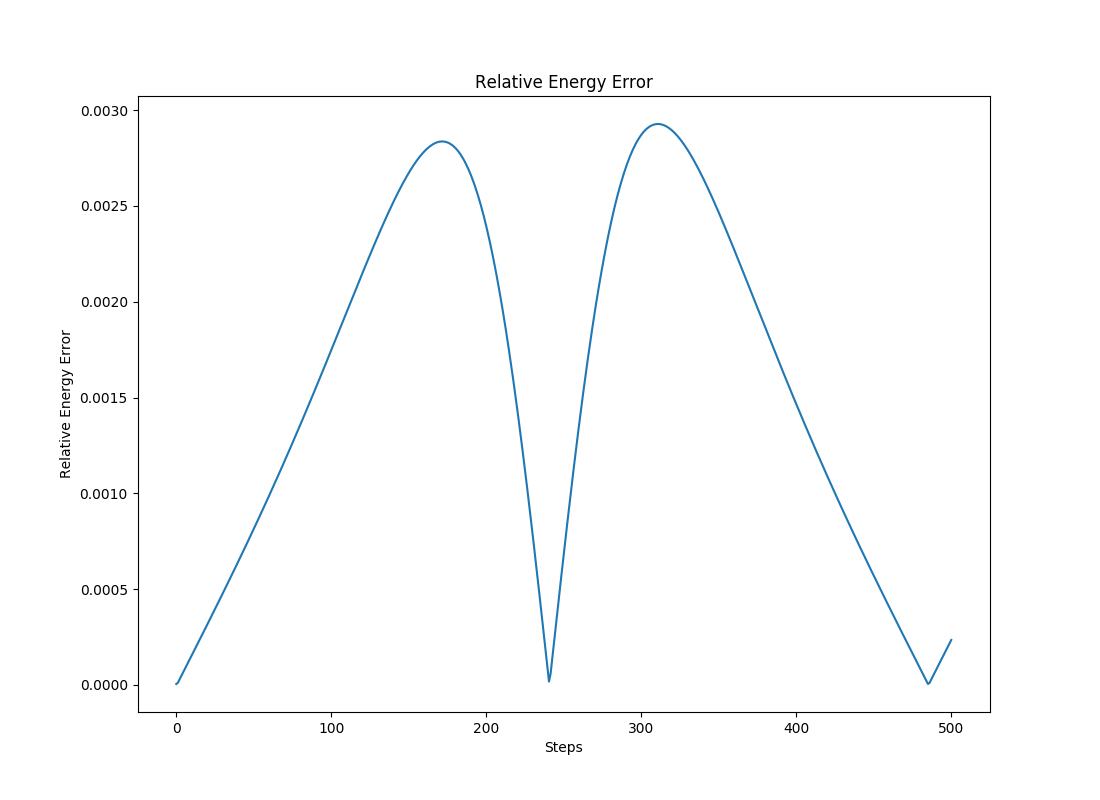

<IPython.core.display.Javascript object>


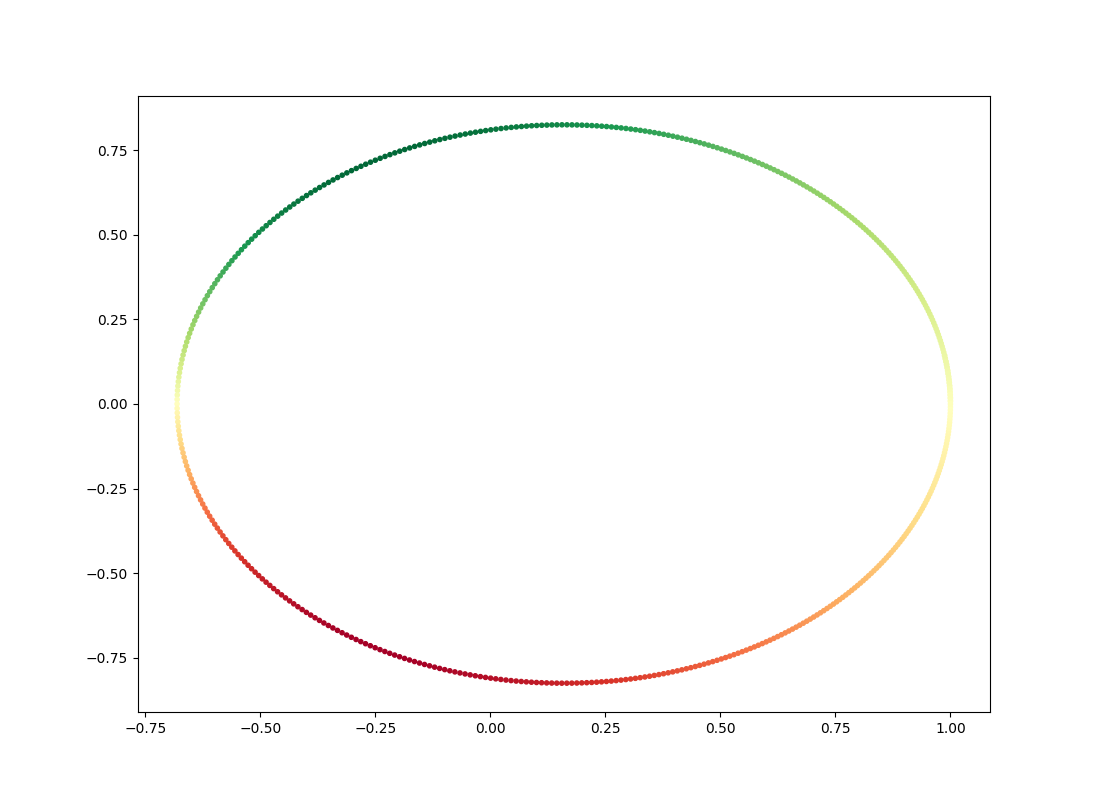

In [74]:
w = np.array([0, 0.9])
s = np.array([1, 0])
stepsize = 0.01
steps = 500

plt.figure(figsize=(11,8))

x_s, y_s, E, _ = calculate_leap(s, w, stepsize, steps)
rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")


plt.figure(figsize=(11,8))


plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")



In [75]:
def calc_abs_leap_energy_err(s, w, h):
    energy_error_time_step = []
    for t in h:
        _, _, E, _ = calculate_leap(s, w, t, steps)
        E_err = np.abs((E[-1]-energy(w,s))/energy(w,s))
        energy_error_time_step.append(E_err)
    return energy_error_time_step

<IPython.core.display.Javascript object>


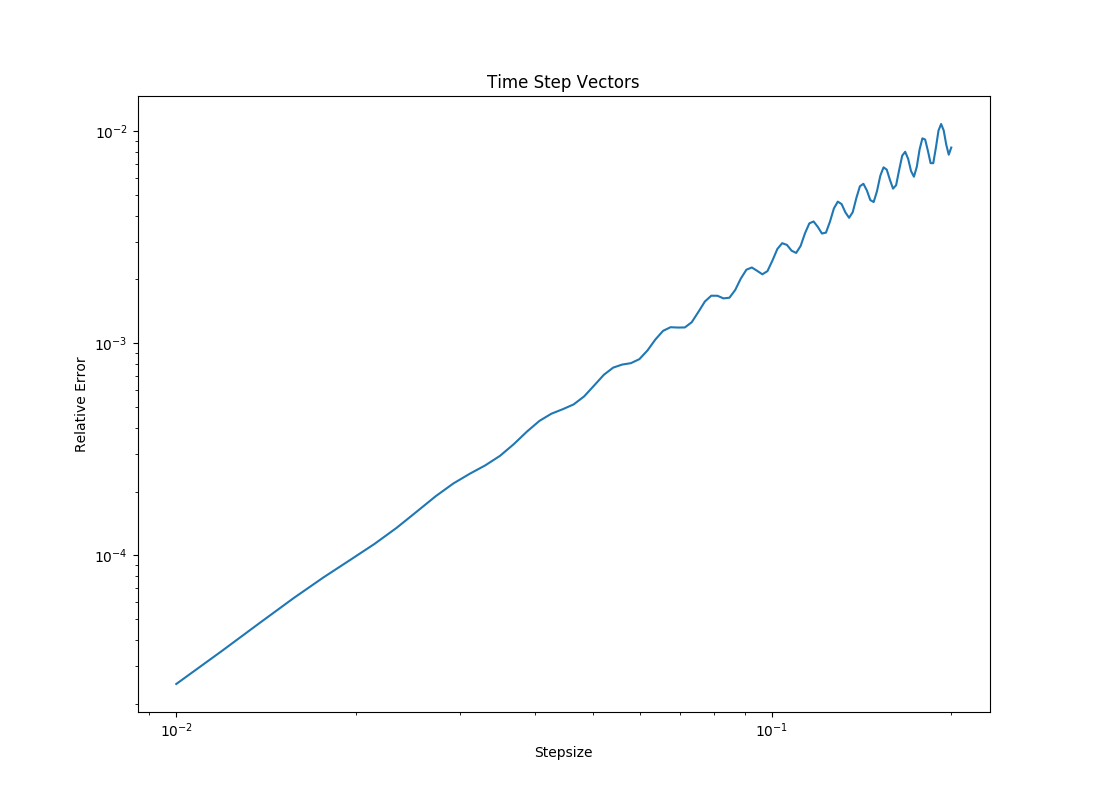

In [76]:
w = np.array([0, 1])
s = np.array([1, 0])
h = np.linspace(0.01, 0.2, 100)

plt.figure(figsize=(11,8))
plt.title("Time Step Vectors")
plt.xlabel("Stepsize")
plt.ylabel("Relative Error")
plt.yscale("log")
plt.xscale("log")
rel_E_err = calc_abs_leap_energy_err(s, w, h)
plt.plot(h, rel_E_err)

In [77]:
#Same functions as above but in 3d
def turn_vectors_into_3_arrays(List):
    x_list = []
    y_list = []
    z_list = []
    for i in List:
        x_list.append(i[0])
        y_list.append(i[1])
        z_list.append(i[2])
    return x_list, y_list, z_list

def calculate_3d(s_0, w_0, h, steps):
    S = []
    W = []
    E = []
    for i in range(steps):
        s_i = s_0 + (w_0*h)
        w_i = w_0 - ((s_0/norm(s_0)**3) * h)
        W.append(w_i)
        S.append(s_i)
        e = energy(w_i, s_i)
        E.append(e)
        s_0 = s_i
        w_0 = w_i
    x_s, y_s, z_s = turn_vectors_into_3_arrays(S)
    return x_s, y_s, z_s, E, W

def calculate_leap_3d(s_0, w_0, h, steps):
    S = []
    W = []
    E = []
    for i in range(steps):
        if i == 0:
            w_i_12 = w_0 - (((s_0/norm(s_0)**3) * h*0.5))
        else:
            w_i_12 = w_0 - (((s_0/norm(s_0)**3) * h))
        s_i_1 = s_0 + w_i_12*h
        W.append(w_i_12)
        S.append(s_i_1)
        e = energy(w_i_12, s_i_1)
        E.append(e)
        s_0 = s_i_1
        w_0 = w_i_12
    x_s, y_s, z_s = turn_vectors_into_3_arrays(S)
    return x_s, y_s, z_s, E, W


<IPython.core.display.Javascript object>


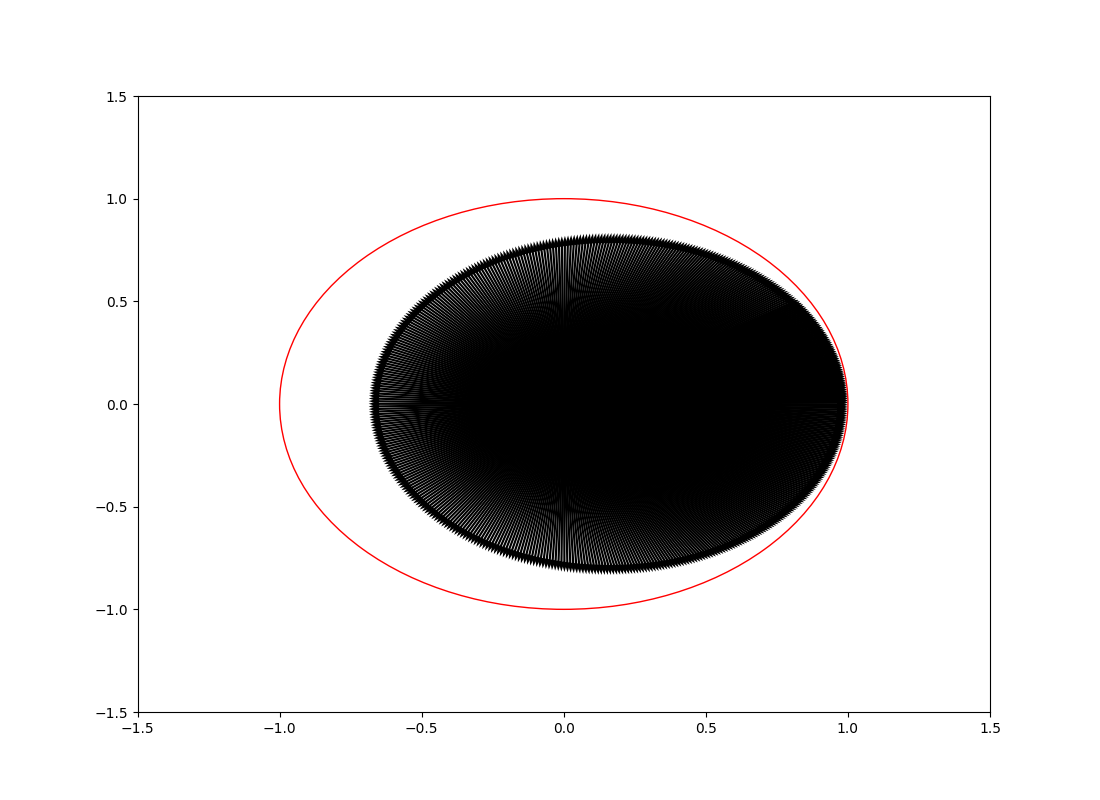

<IPython.core.display.Javascript object>


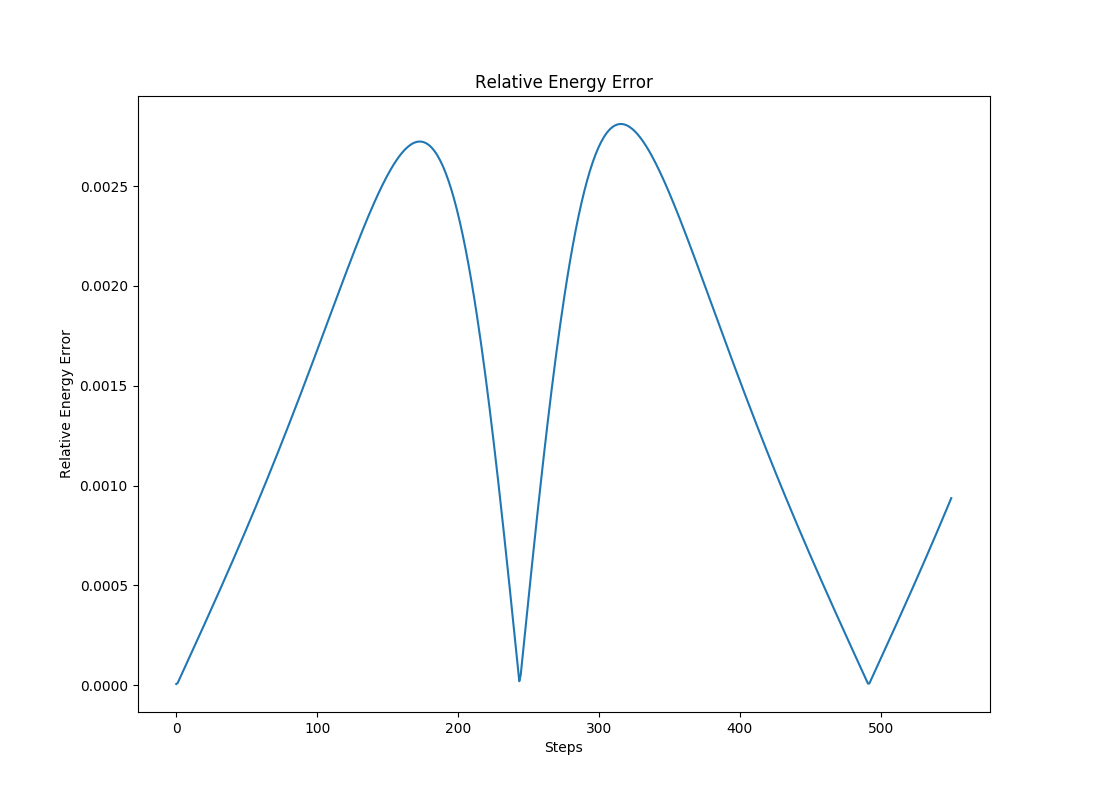

<IPython.core.display.Javascript object>


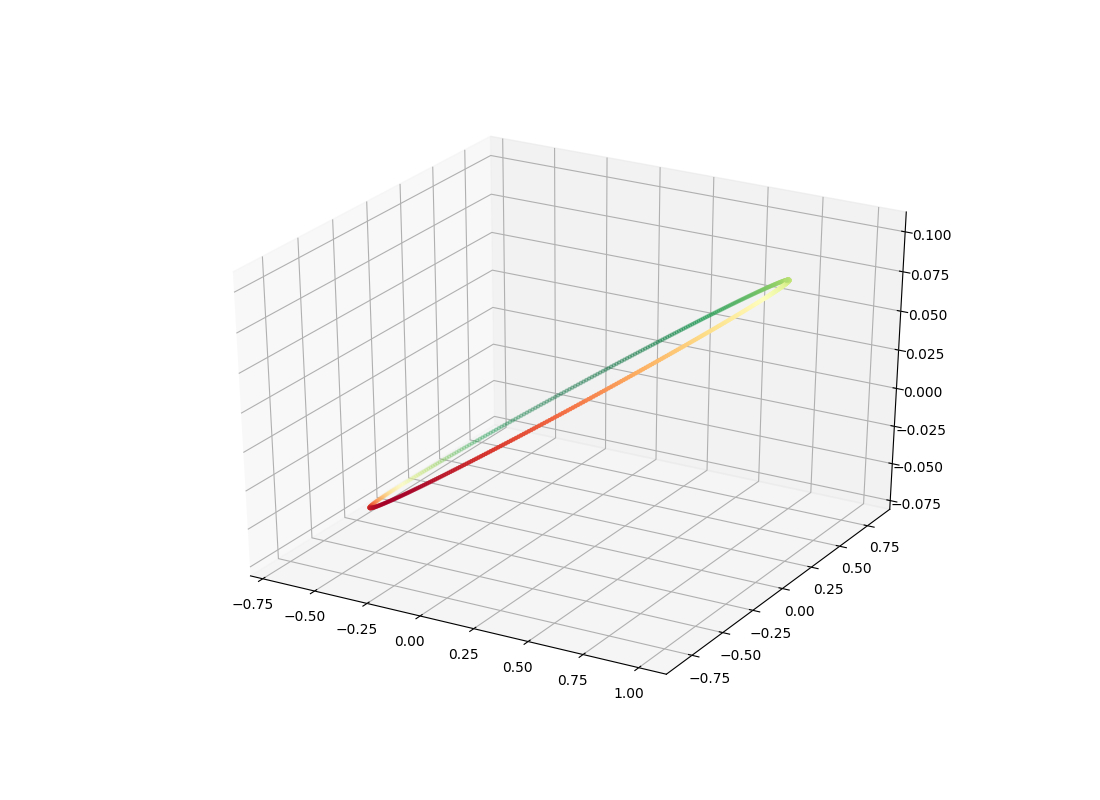

In [78]:
w = np.array([0, 0.9, 0])
s = np.array([1, 0, 0.1])
stepsize = 0.01
steps = 550

plt.figure(figsize=(11,8))

x_s, y_s, z_s, E, _ = calculate_leap_3d(s, w, stepsize, steps)
rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_s, y_s, z_s, c=E, cmap='RdYlGn_r', marker=".")

<IPython.core.display.Javascript object>


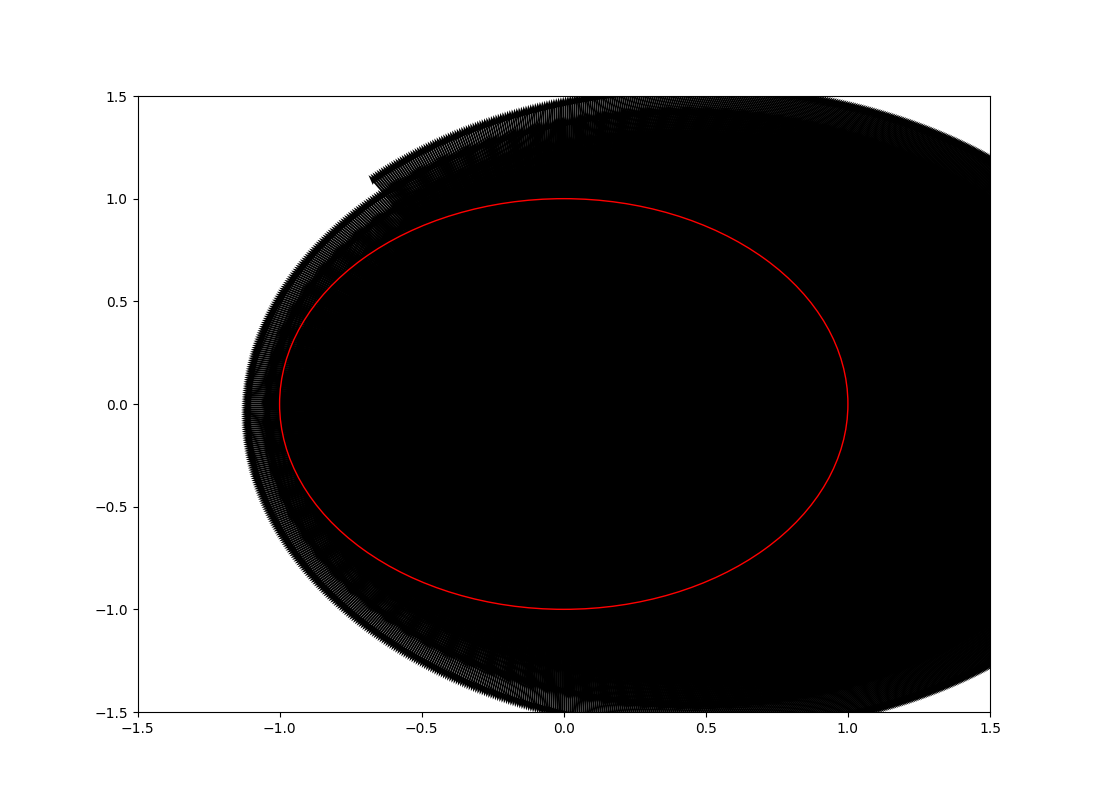

<IPython.core.display.Javascript object>


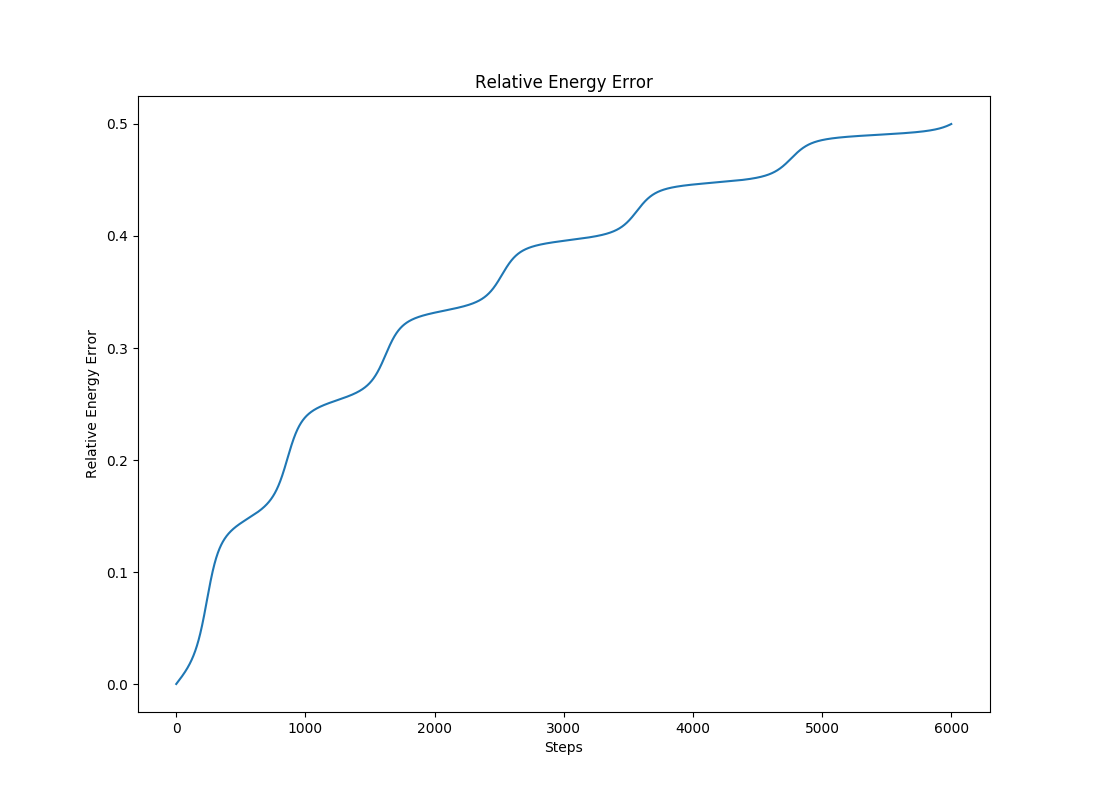

<IPython.core.display.Javascript object>


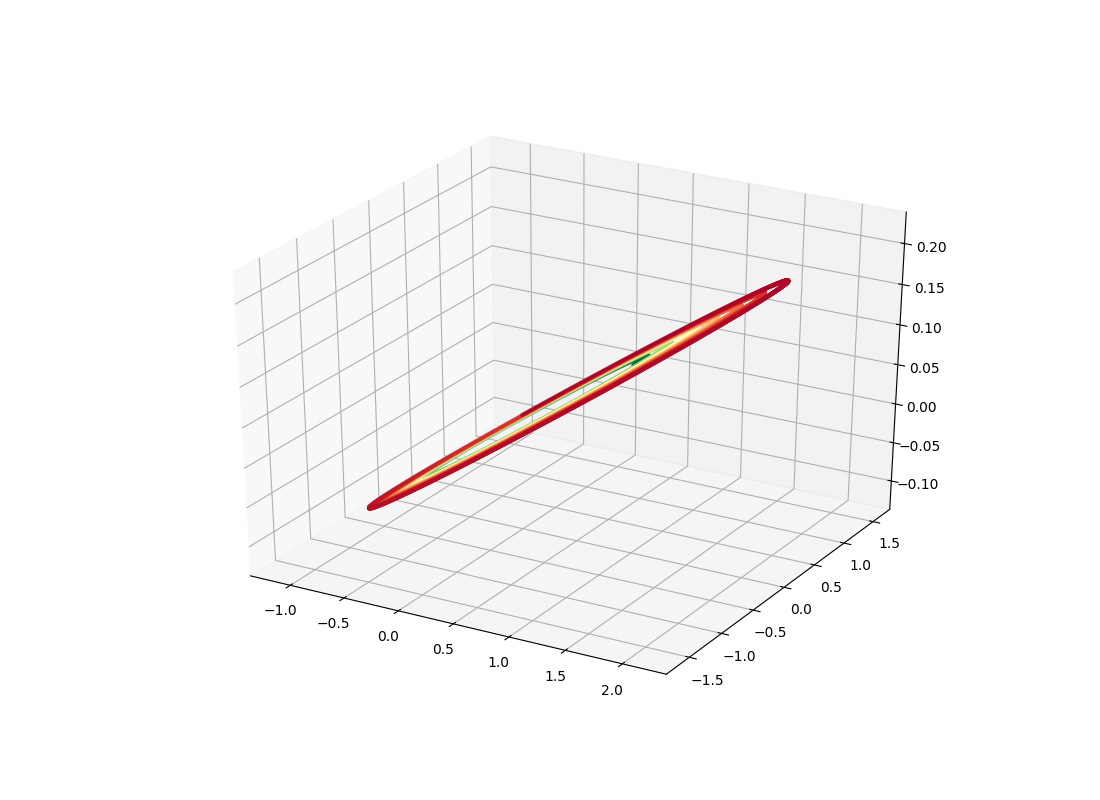

In [79]:
#Comparison 3d normal euler ellipse
w = np.array([0, 0.9, 0])
s = np.array([1, 0, 0.1])
stepsize = 0.01
steps = 6000

plt.figure(figsize=(11,8))

x_s, y_s, z_s, E, _ = calculate_3d(s, w, stepsize, steps)
rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_s, y_s, z_s, c=E, cmap='RdYlGn_r', marker=".")


<IPython.core.display.Javascript object>


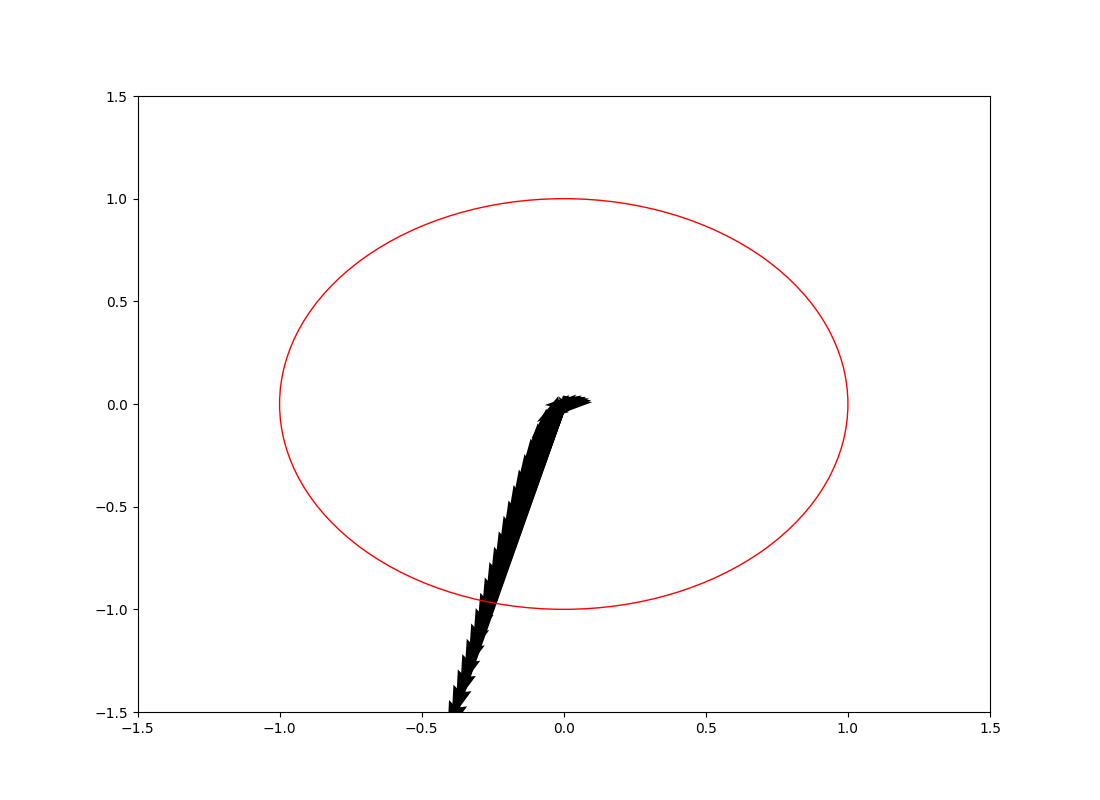

<IPython.core.display.Javascript object>


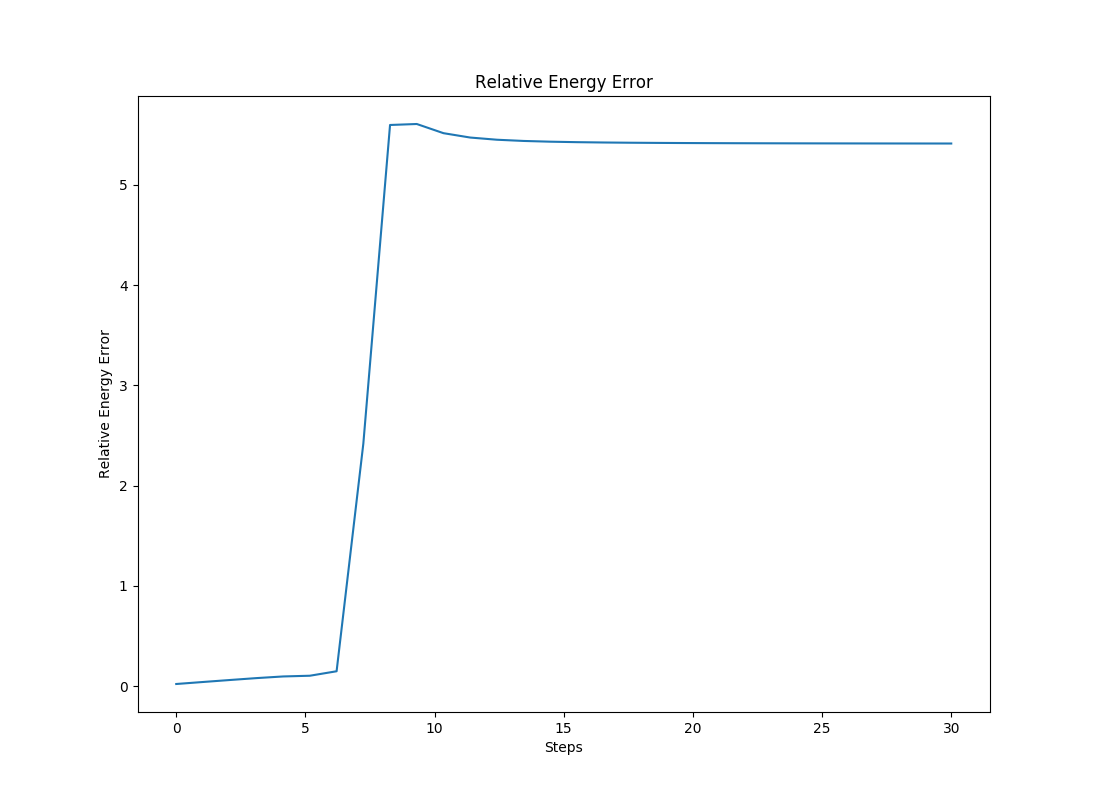

<IPython.core.display.Javascript object>


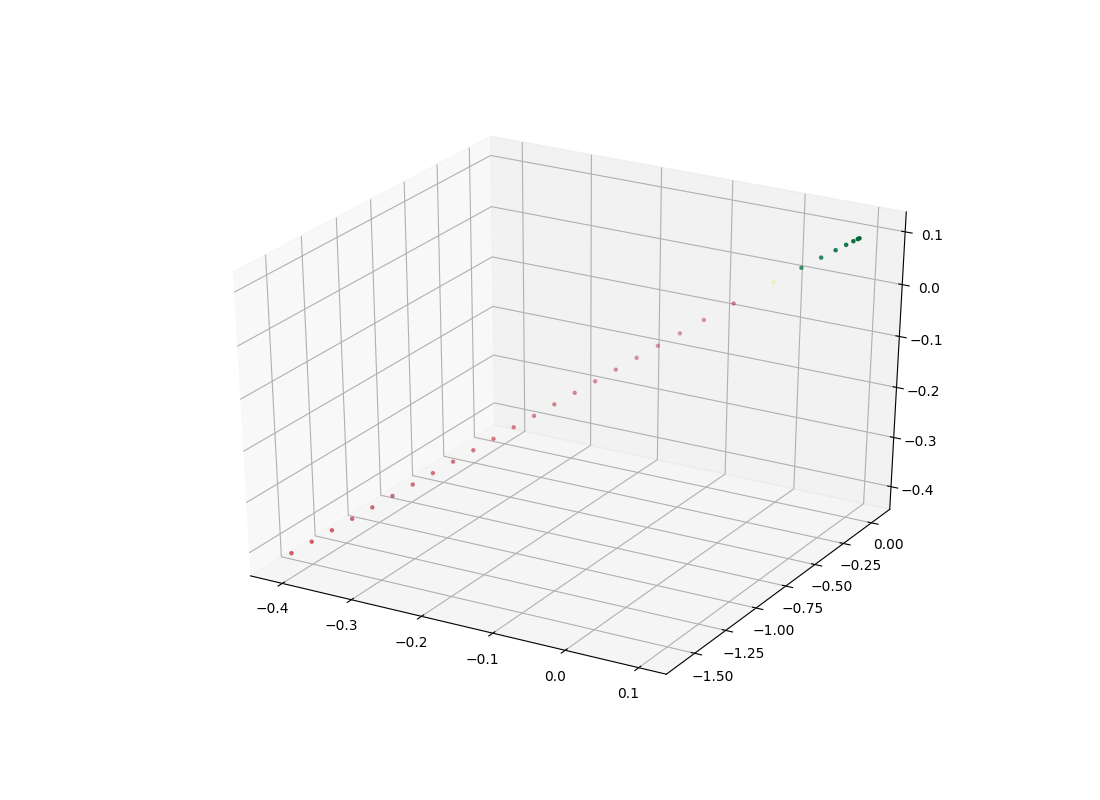

In [80]:
#Normal euler 3d 
w = np.array([0, 0.9, 0])
s = np.array([0.1, 0, 0.1])
stepsize = 0.01
steps = 30

plt.figure(figsize=(11,8))

x_s, y_s, z_s, E, _ = calculate_3d(s, w, stepsize, steps)
rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_s, y_s, z_s, c=E, cmap='RdYlGn_r', marker=".")

<IPython.core.display.Javascript object>


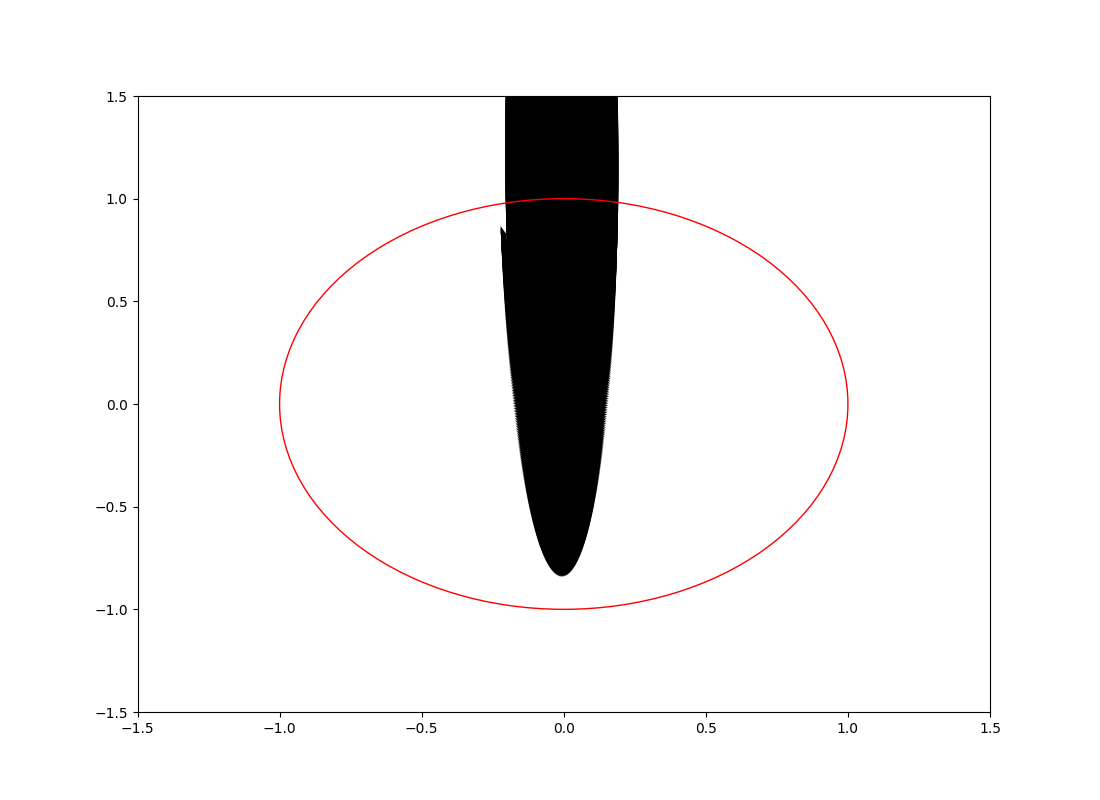

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


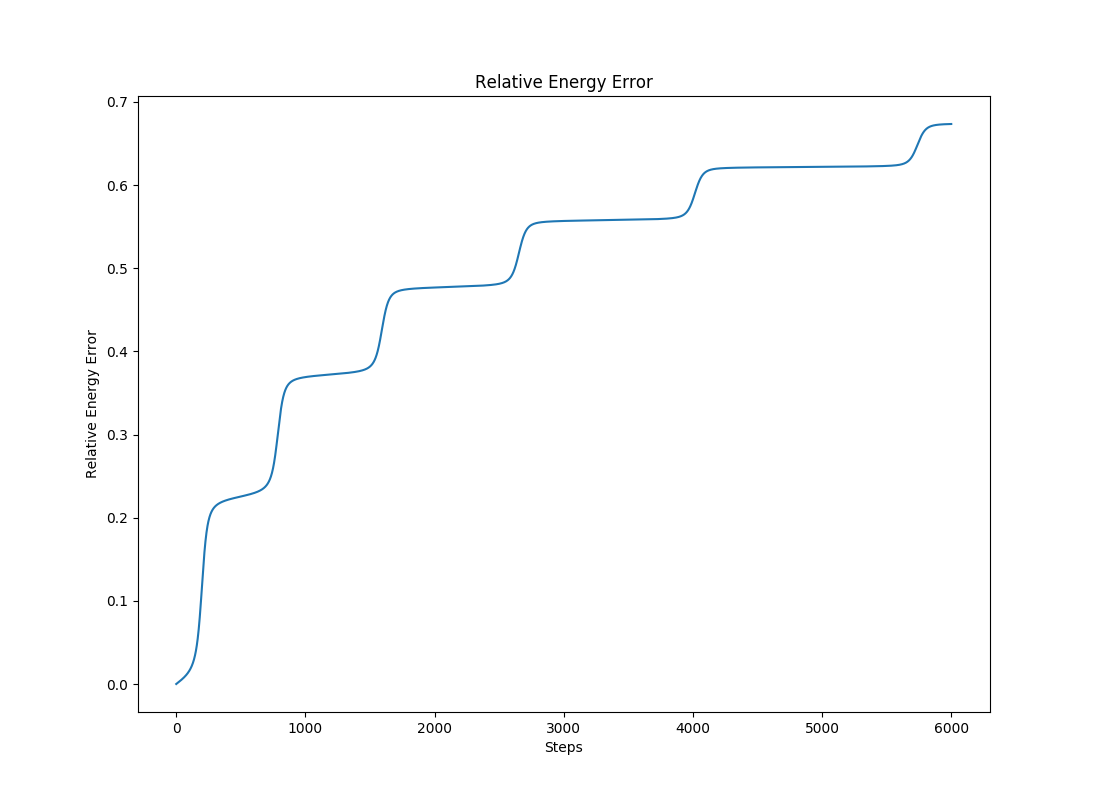

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


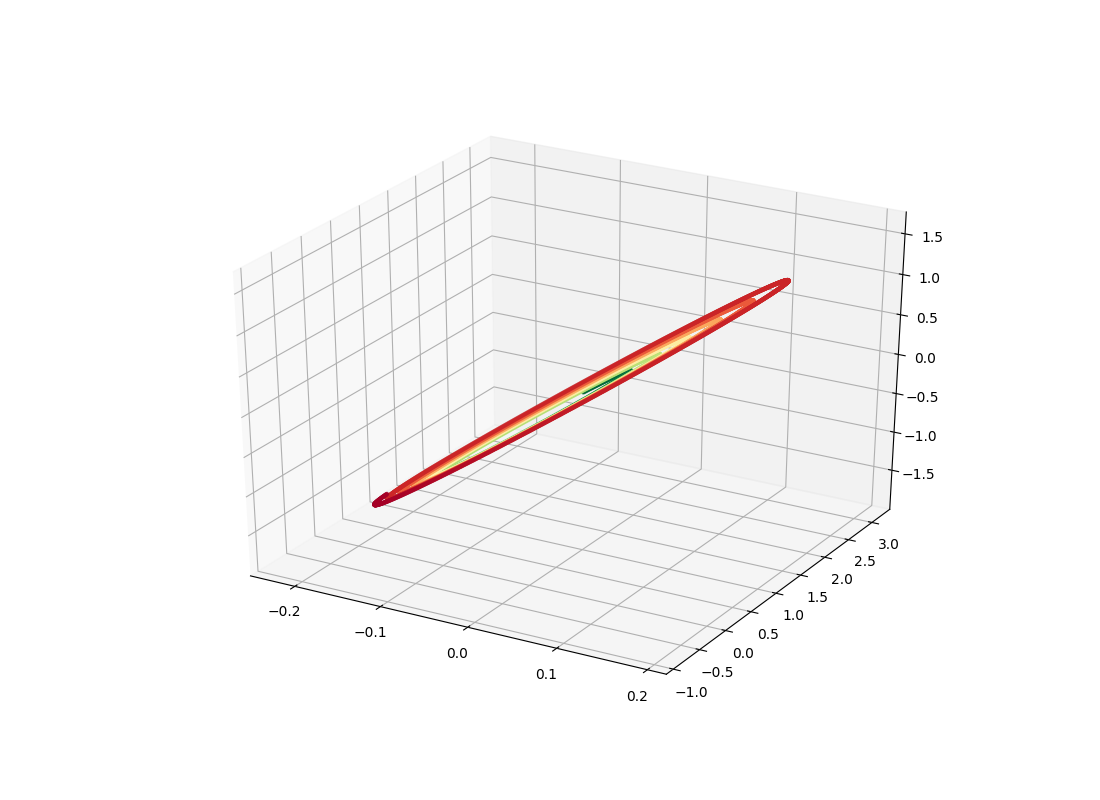

In [81]:
#Comparison 3d normal euler ellipse, gets worse every step
w = np.array([0.1, 0, 0.8])
s = np.array([0, 1, 0])
stepsize = 0.01
steps = 6000

plt.figure(figsize=(11,8))

x_s, y_s, z_s, E, _ = calculate_3d(s, w, stepsize, steps)
rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_s, y_s, z_s, c=E, cmap='RdYlGn_r', marker=".")



/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


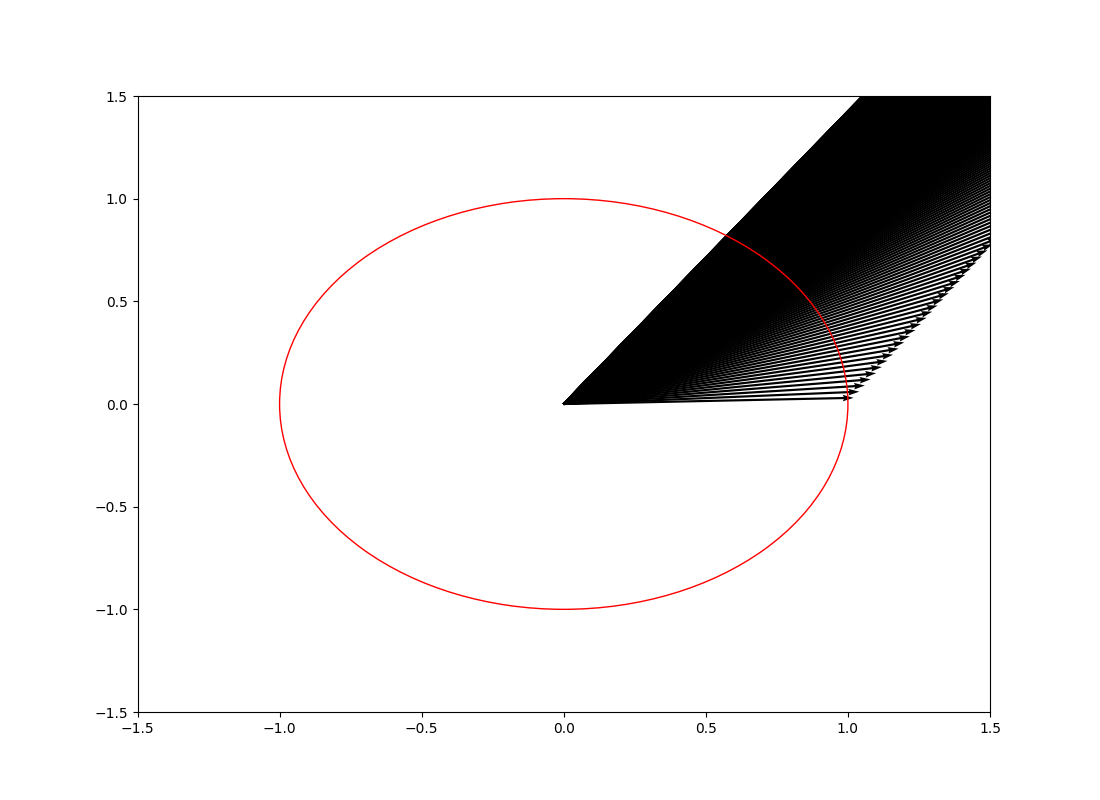

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


<IPython.core.display.Javascript object>


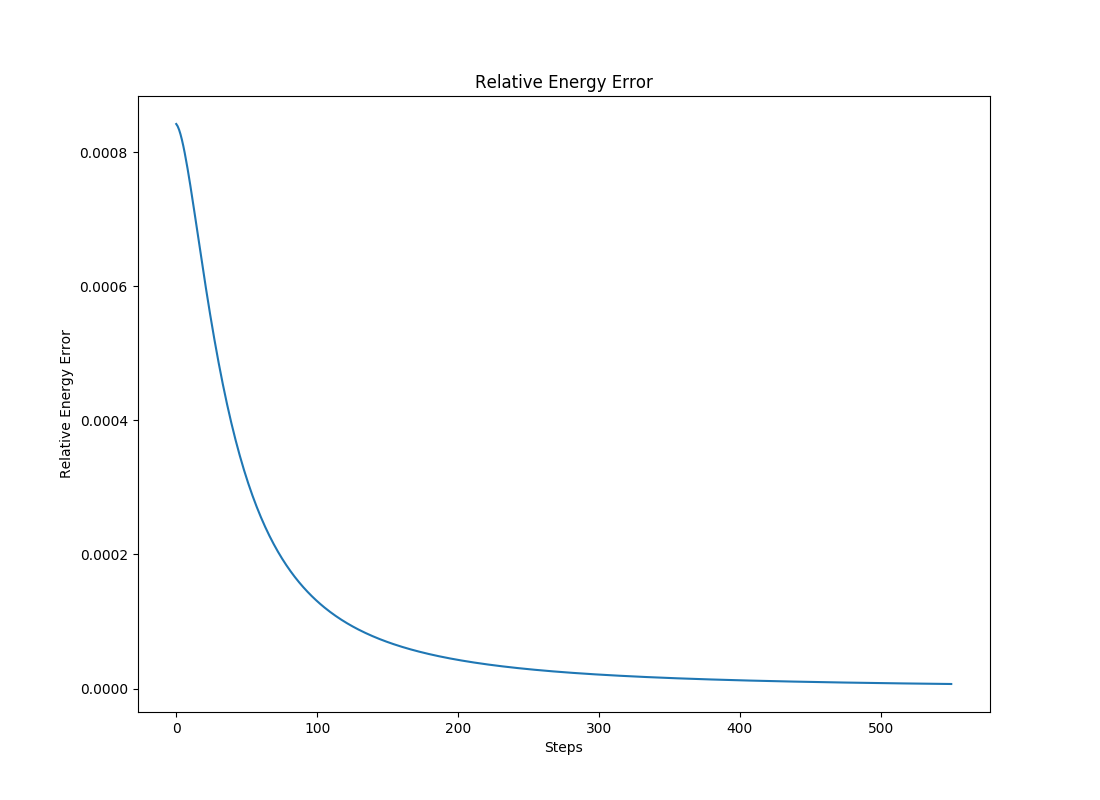

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


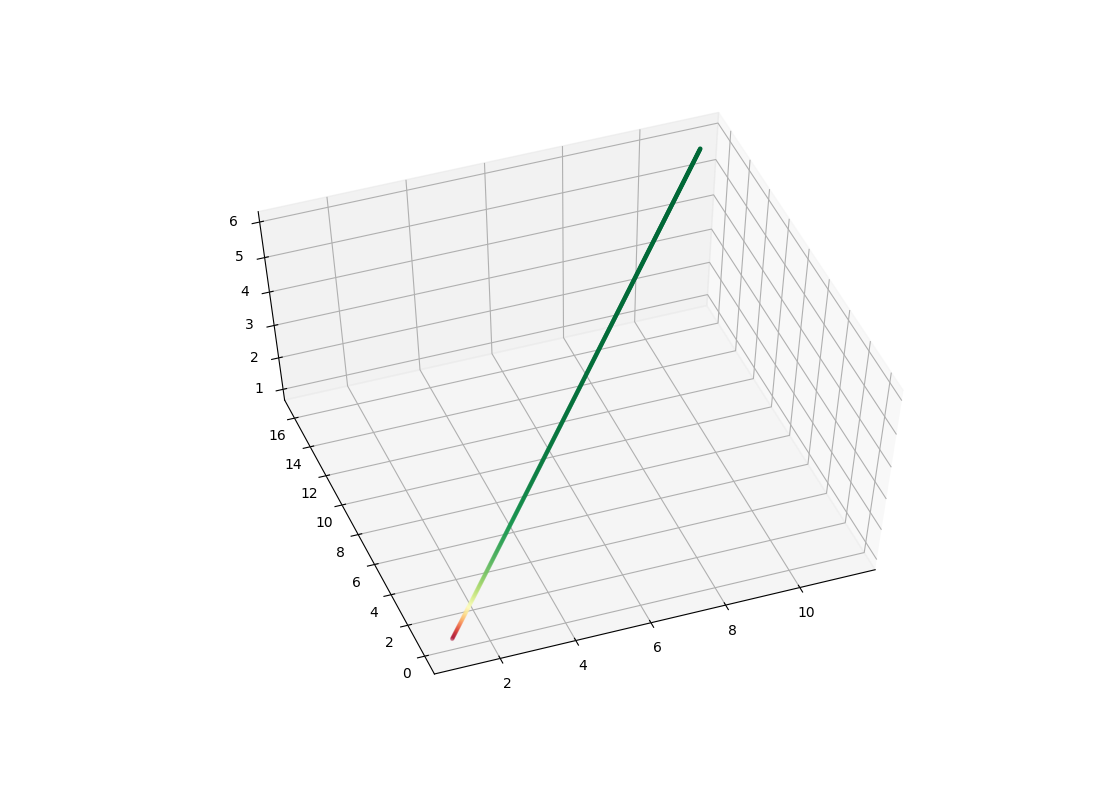

In [85]:
w = np.array([2, 3, 1])
s = np.array([1, 0, 1])
stepsize = 0.01
steps = 550

plt.figure(figsize=(11,8))

x_s, y_s, z_s, E, _ = calculate_leap_3d(s, w, stepsize, steps)
rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_s, y_s, z_s, c=E, cmap='RdYlGn_r', marker=".")